In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
%matplotlib inline
from ovejero import model_trainer, data_tools, bnn_inference

# Testing the Performance of Trained Models

__Author:__ Sebastian Wagner-Carena

__Created:__ 11/15/2019

__Last Run:__ 11/15/2019

__Goals:__ Inspect how the different bnn types and data augmentation strategies change the performance

## Diagonal Posterior - Normalizing Inputs

In [2]:
# First specify the config path
root_path = '/Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/'
config_path = root_path + 'configs/nn1.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)

def recursive_str_checker(cfg_dict):
    for key in cfg_dict:
        if isinstance(cfg_dict[key],str):
            cfg_dict[key] = cfg_dict[key].replace('/home/swagnercarena/ovejero/',root_path)
        if isinstance(cfg_dict[key],dict):
            recursive_str_checker(cfg_dict[key])
recursive_str_checker(cfg)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 1000
save_path_nn1 = root_path + 'validation_results/nn1_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn1)

Is model built: True
No weights found. Saving new weights to /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn1.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn1_samps/


In [3]:
bnn_infer.report_stats()

Parameter, RMSE, Median Abs Error, Median Std
external_shear_g1 0.03069215501436516 0.00925034084973803 0.013255594672383478
external_shear_g2 0.02504668221527251 0.00927357458668191 0.013718955468096754
lens_mass_center_x 0.014335698241125973 0.005561874682156673 0.01092493956884483
lens_mass_center_y 0.01622211135215236 0.00567498538023032 0.010969964514570111
lens_mass_e1 0.03820321447490026 0.016187780306650024 0.025057791985588024
lens_mass_e2 0.03553132810697861 0.014451101270651186 0.025122658802532713
lens_mass_gamma 0.062210014509338676 0.029850145946481943 0.04444121062244889
lens_mass_theta_E_log 0.020447712449410665 0.005877220262634458 0.010105401203345025


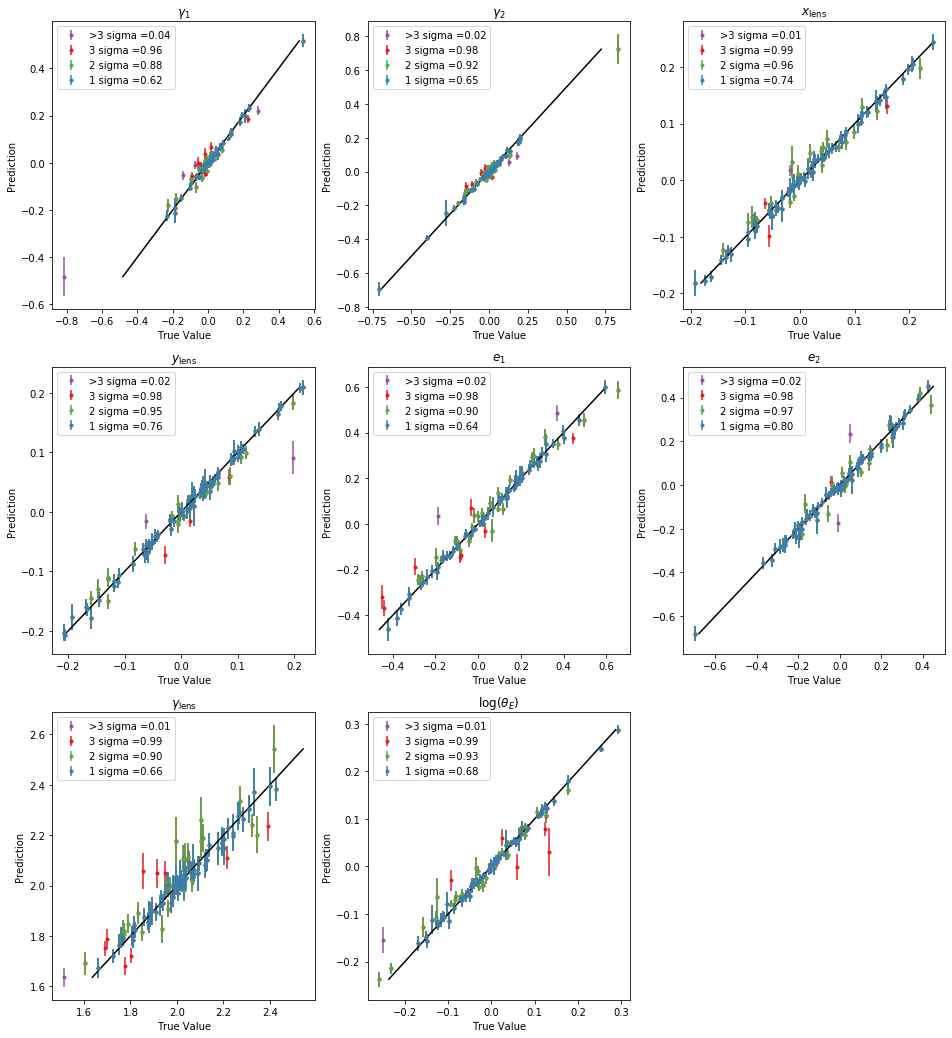

In [4]:
num_lenses = 100
bnn_infer.gen_coverage_plots(num_lenses=num_lenses)

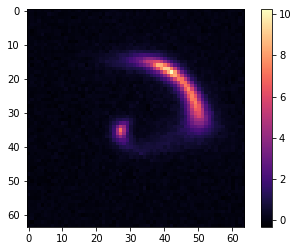

external_shear_g1 -0.021468163
external_shear_g2 0.06325667
lens_mass_center_x 0.11296053
lens_mass_center_y -0.0064377612
lens_mass_e1 0.13514622
lens_mass_e2 -0.10897897
lens_mass_gamma 2.0121353
lens_mass_theta_E_log 0.009762687


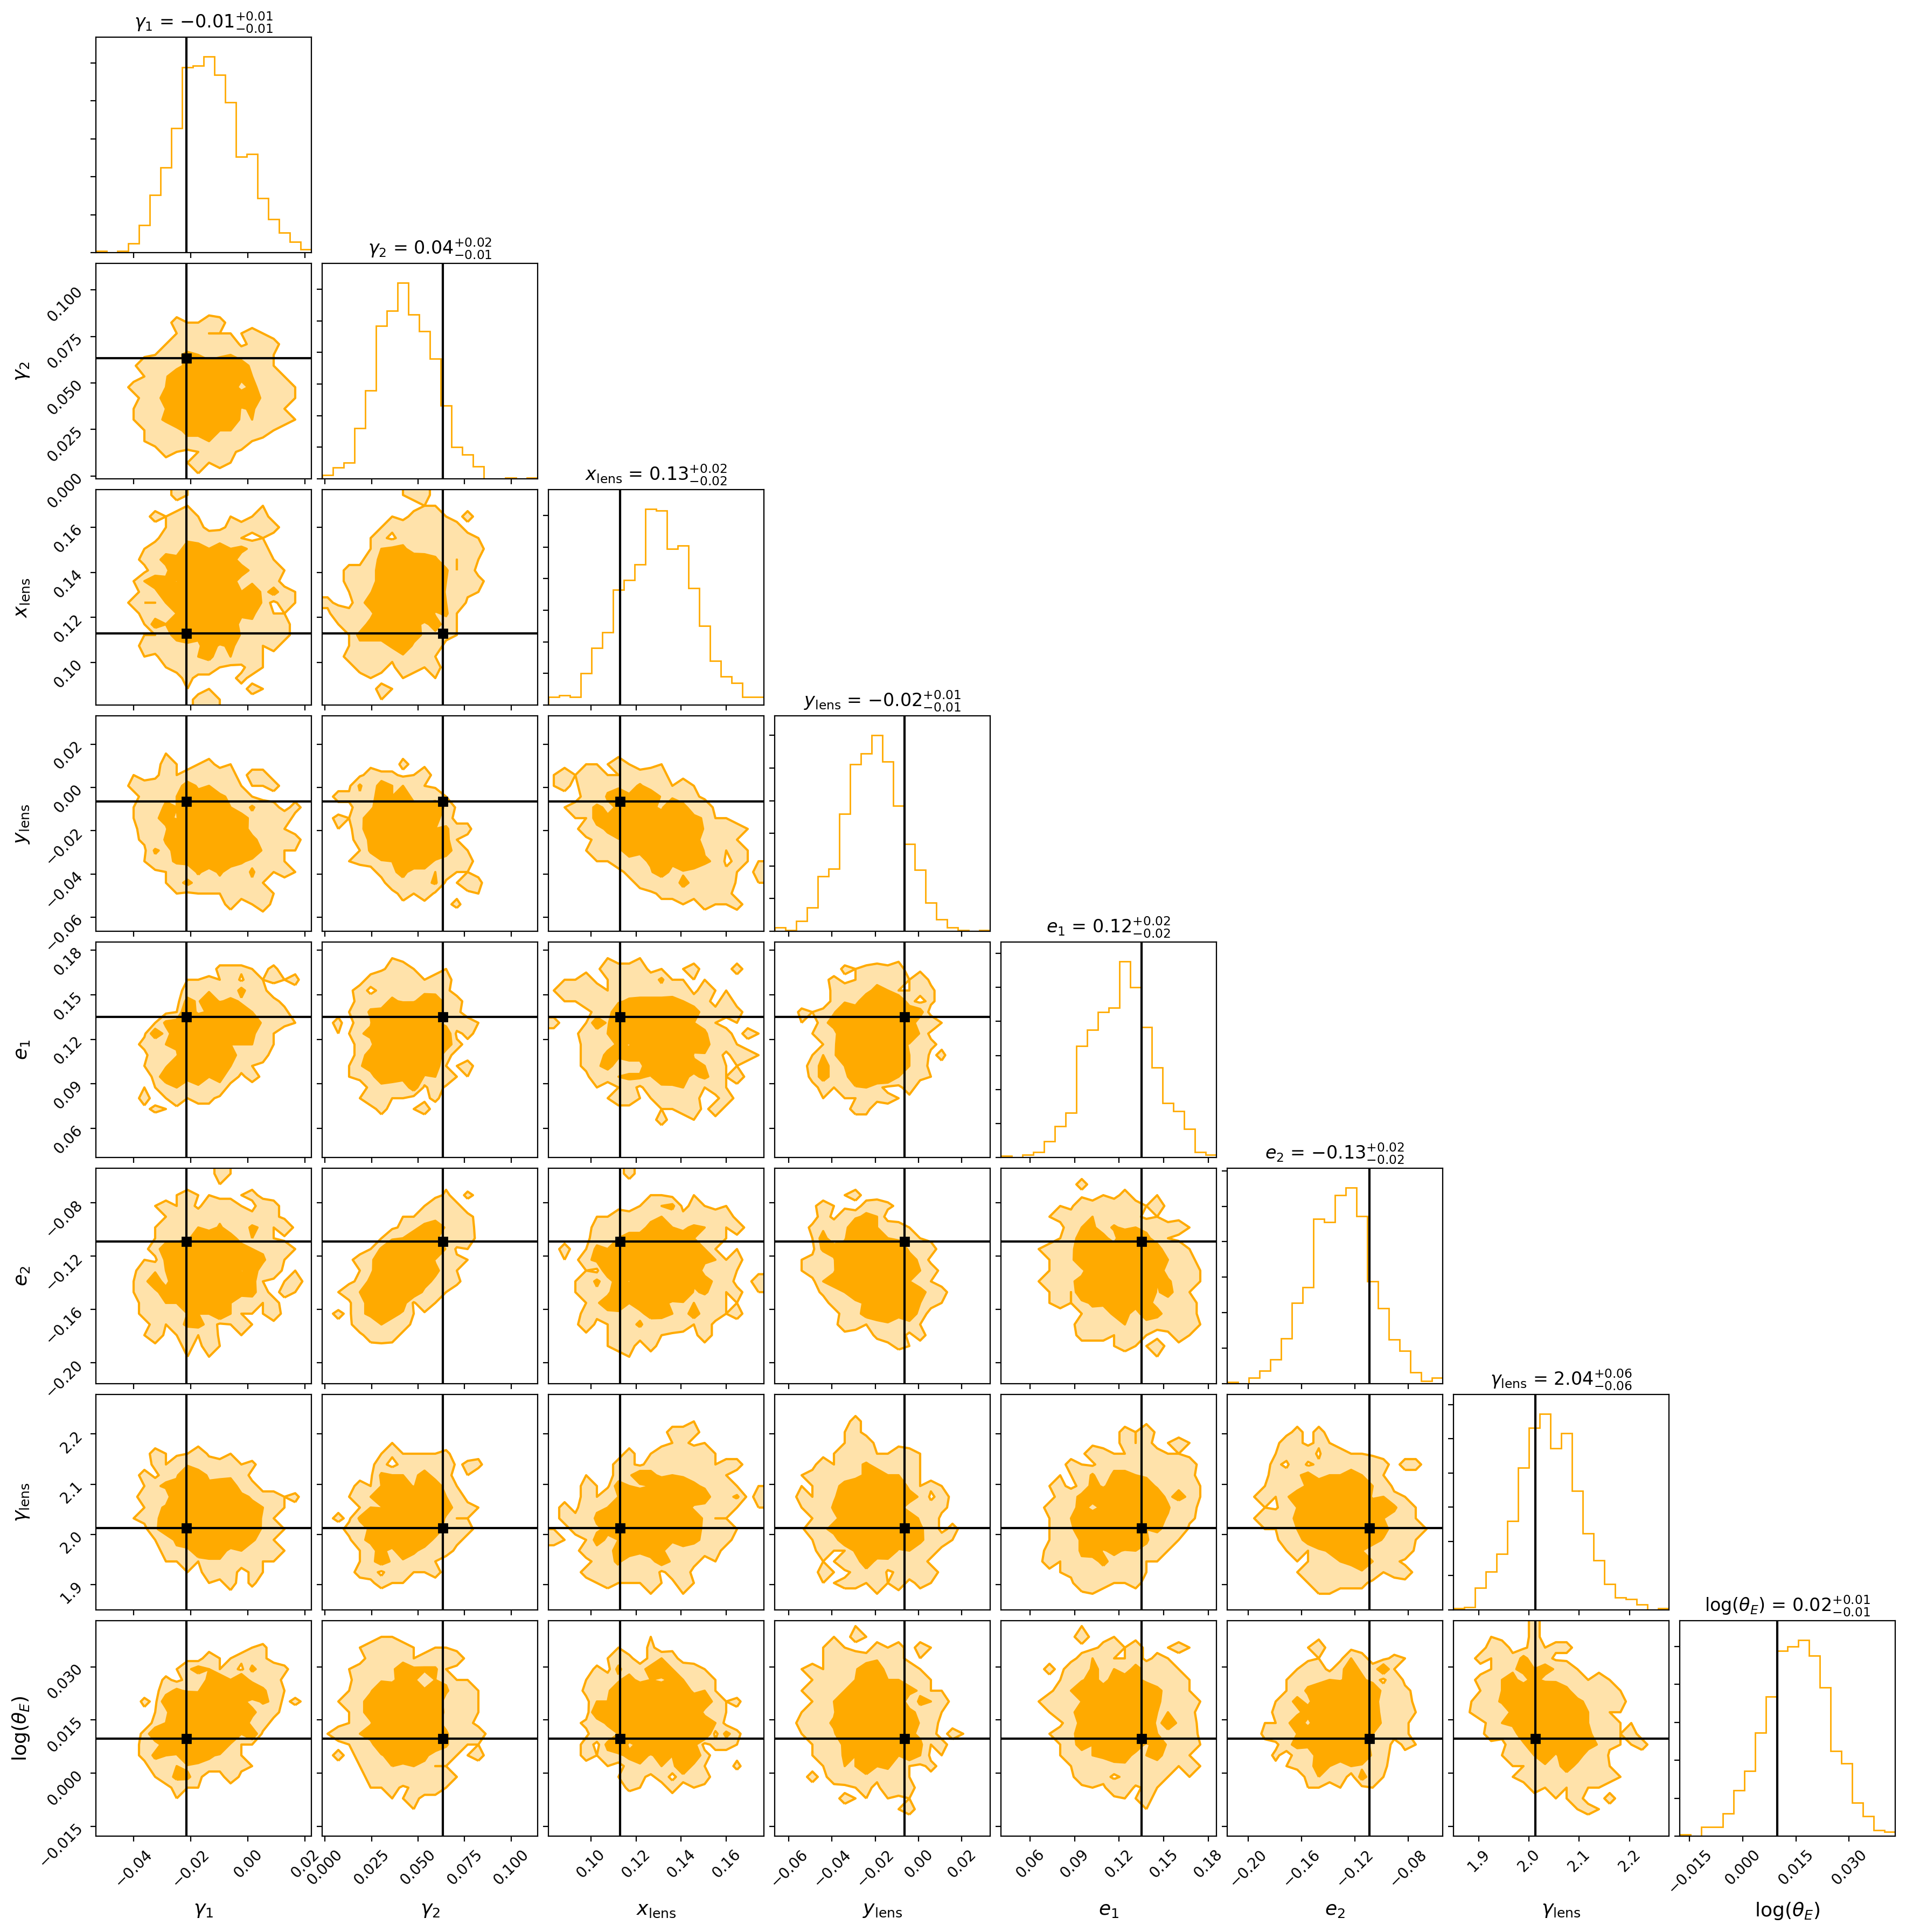

In [5]:
image_index = 8
bnn_infer.plot_posterior_contours(image_index)

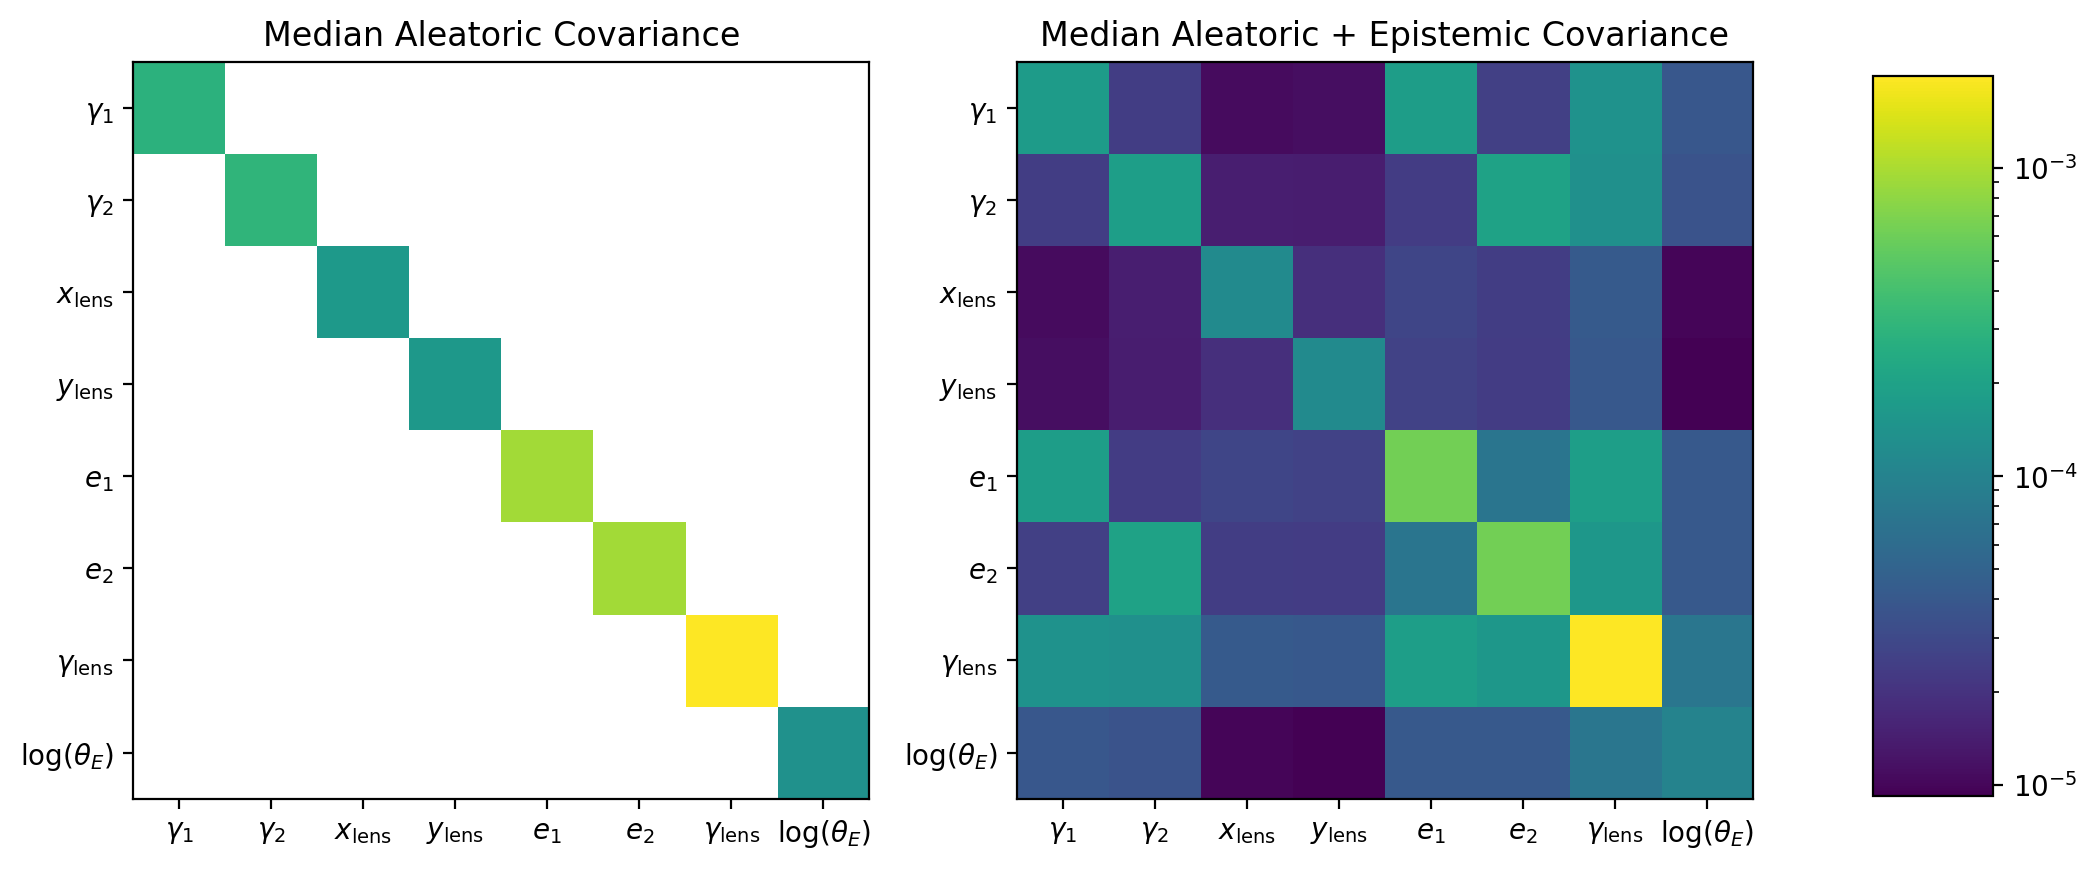

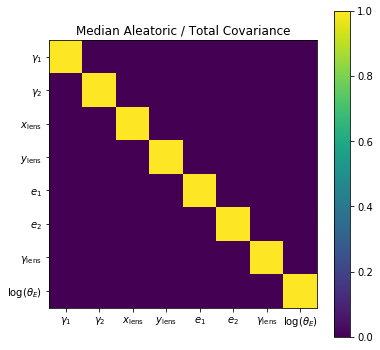

In [6]:
bnn_infer.comp_al_ep_unc(norm_diagonal=False)

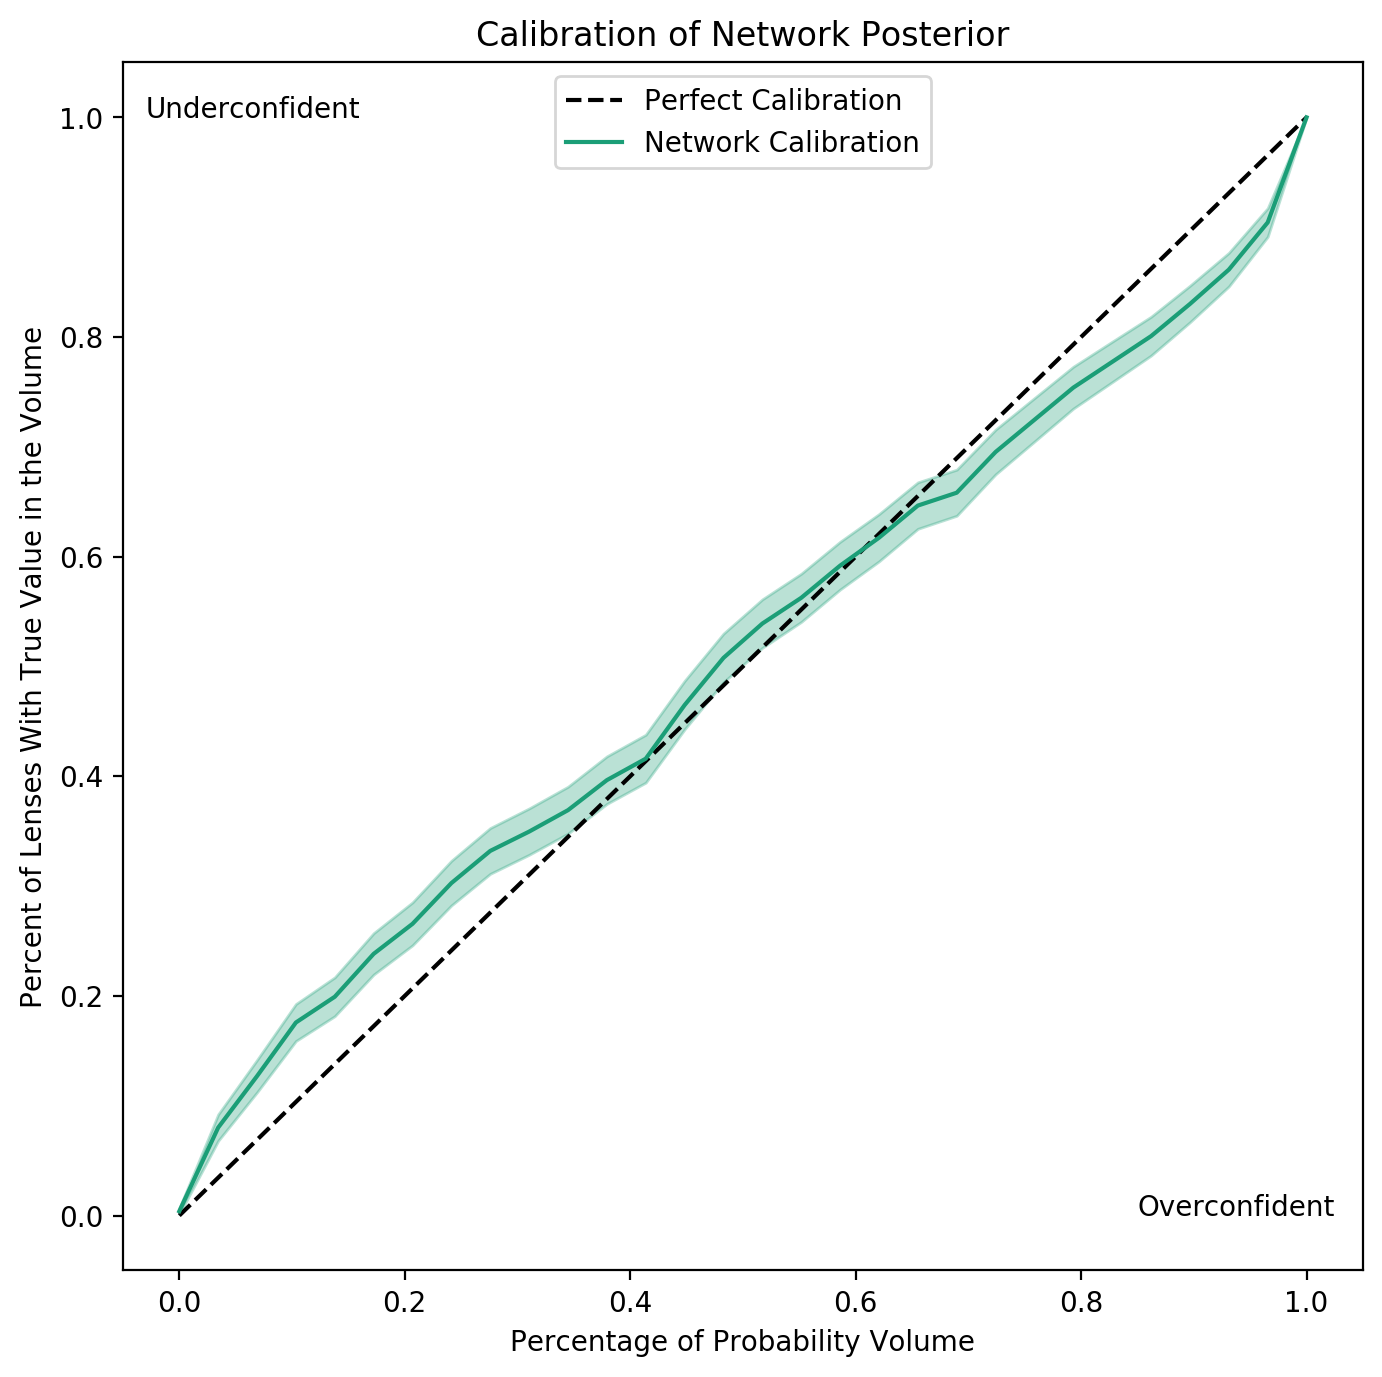

In [7]:
color_map = ['#000000','#1b9e77']
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False)

## Diagonal High Regularizer

In [8]:
config_path = root_path + 'configs/nn1_hr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
save_path_nn1_hr = root_path + 'validation_results/nn1_hr_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn1_hr)

Is model built: True
No weights found. Saving new weights to /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn1_hr.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn1_hr_samps/


In [9]:
bnn_infer.report_stats()

Parameter, RMSE, Median Abs Error, Median Std
external_shear_g1 0.03678590266276472 0.012581828653213903 0.020477685692782088
external_shear_g2 0.028375698587977737 0.011477017440440222 0.0212843968337134
lens_mass_center_x 0.01659465245315142 0.0066461007758374414 0.019158168252483
lens_mass_center_y 0.01881345310909542 0.007326840618364472 0.019517318843308123
lens_mass_e1 0.050386823183866114 0.02037481516644956 0.041385581233135765
lens_mass_e2 0.04370800167811836 0.018552816948153326 0.04167579836019046
lens_mass_gamma 0.0762923254647498 0.0386986353028369 0.07285570895813703
lens_mass_theta_E_log 0.023966079333508732 0.007392559136049609 0.016252732922213402


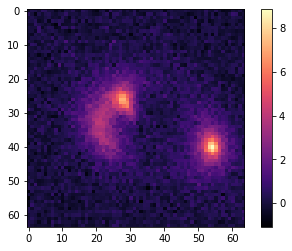

external_shear_g1 -0.002596579
external_shear_g2 0.00048532942
lens_mass_center_x -0.005929324
lens_mass_center_y 0.0014538043
lens_mass_e1 -0.2741162
lens_mass_e2 -0.104493454
lens_mass_gamma 1.7262274
lens_mass_theta_E_log 0.1445223


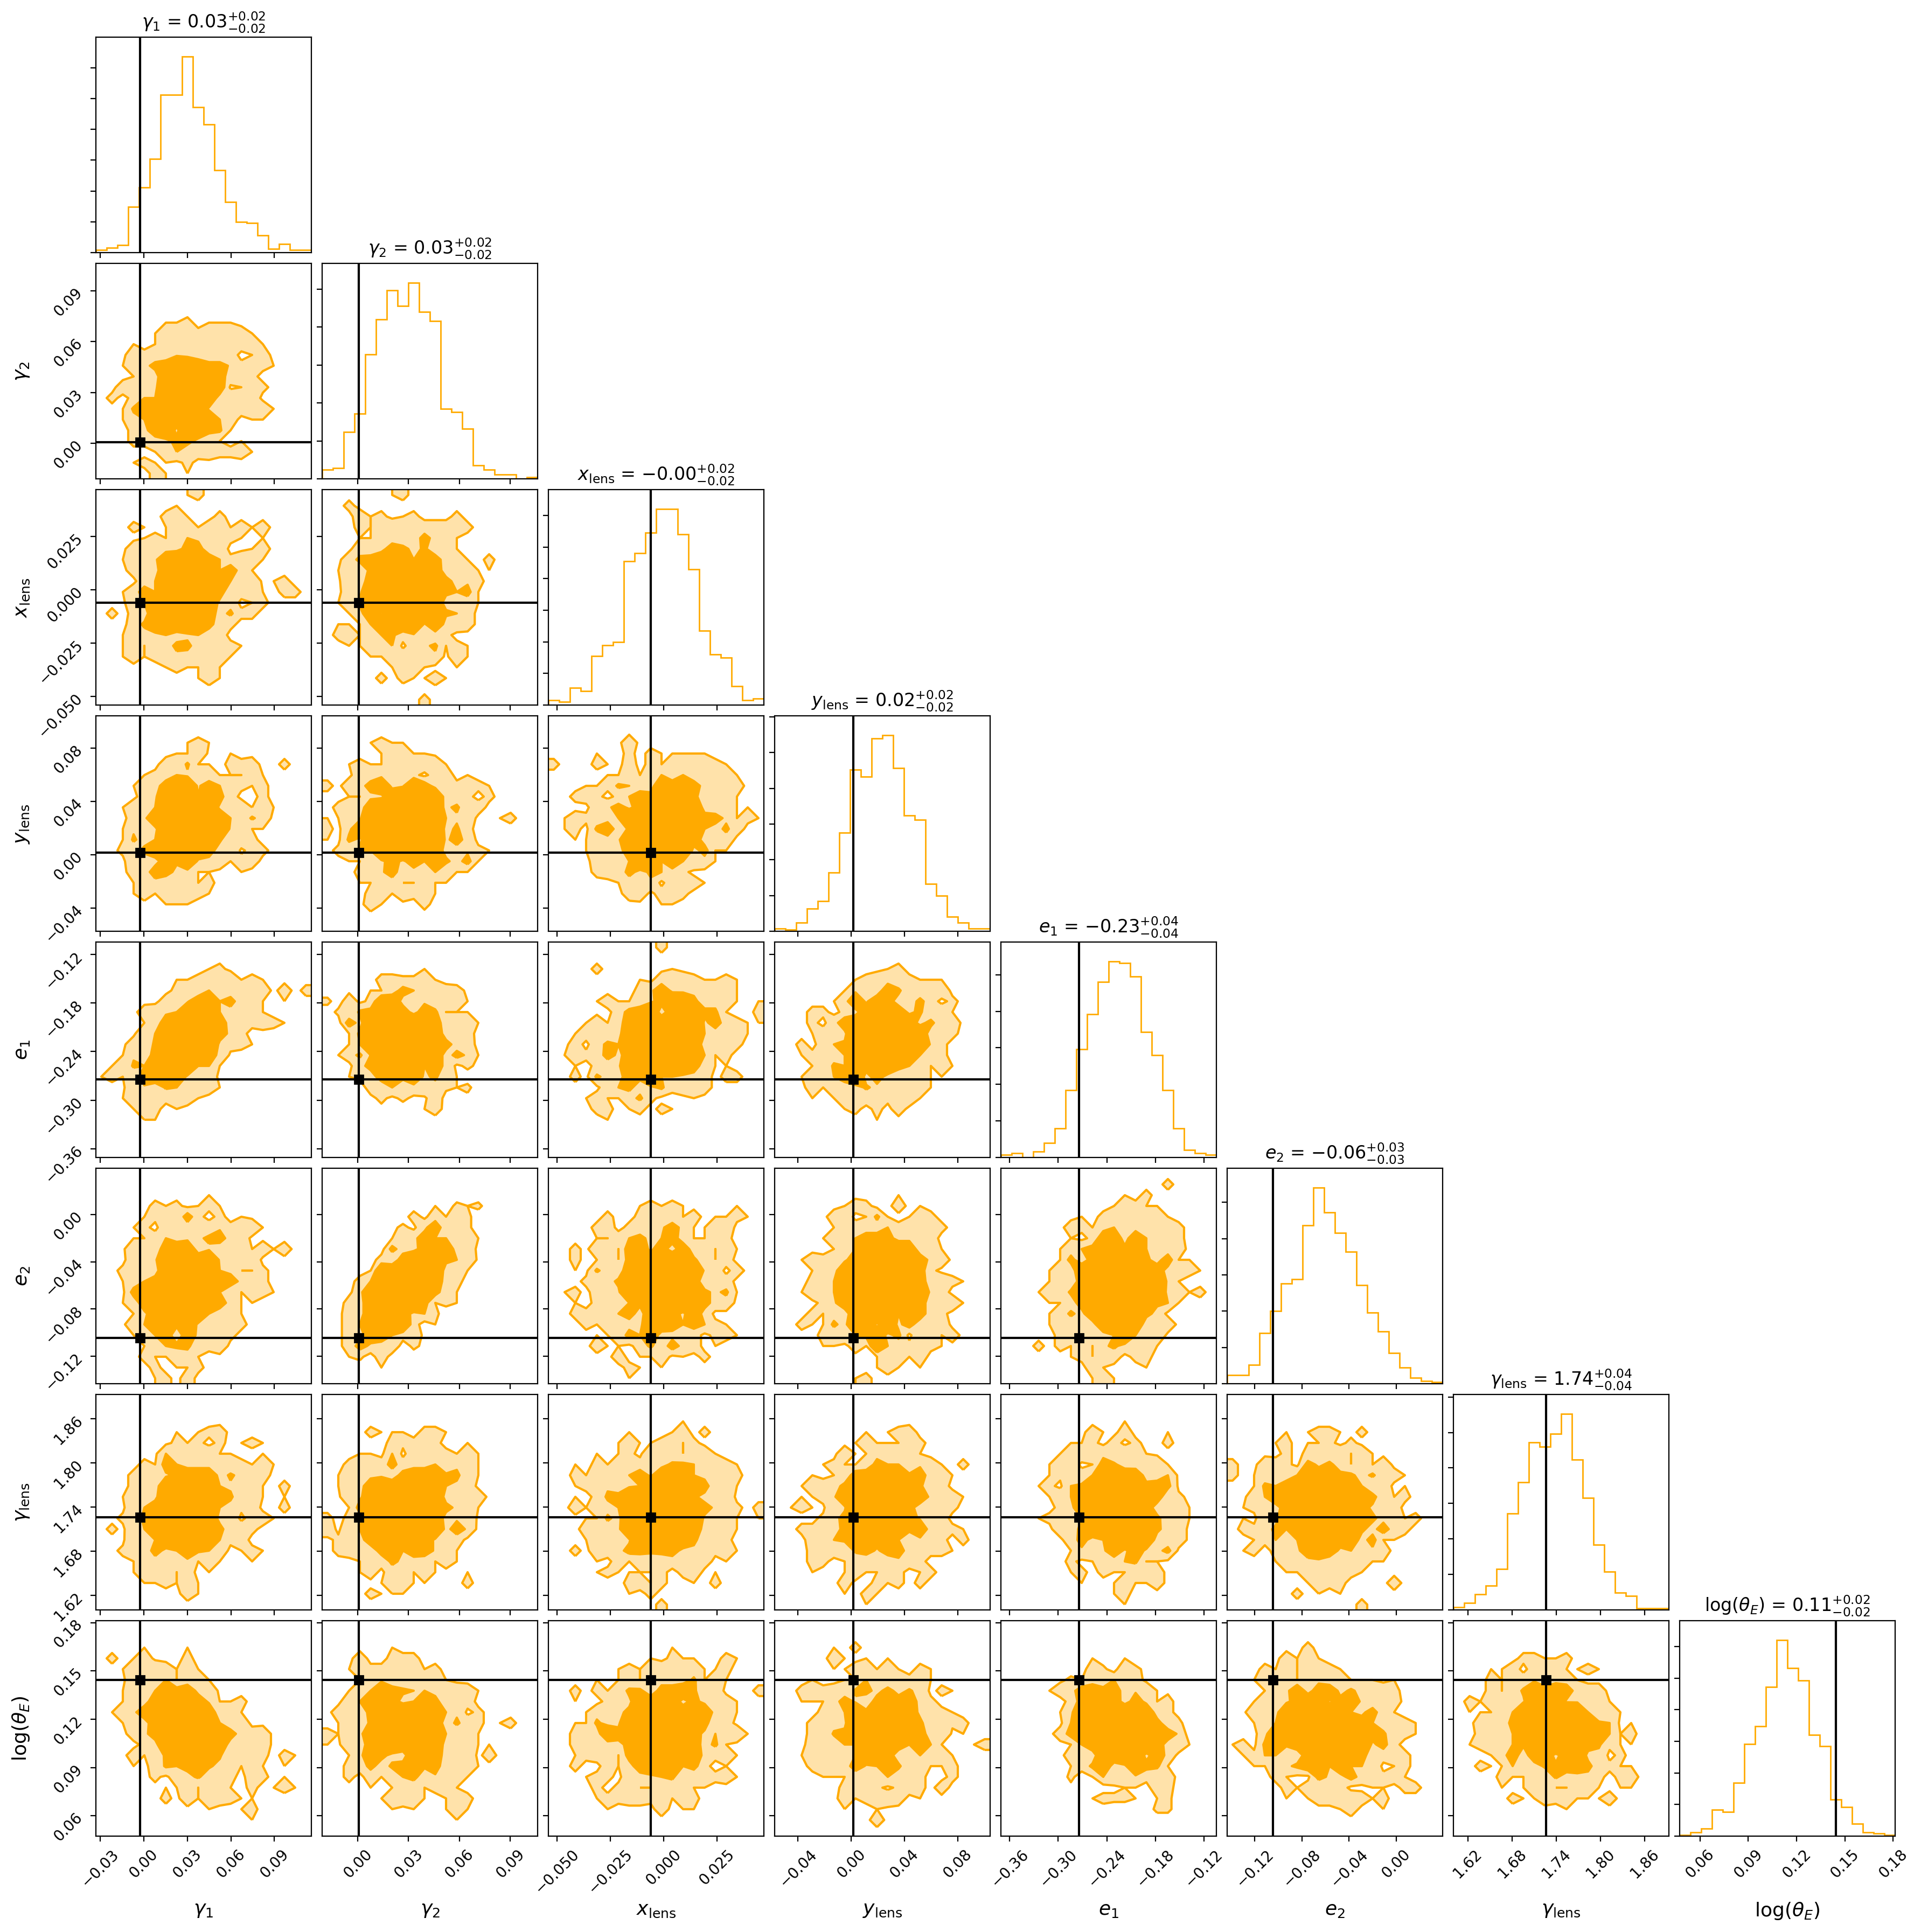

In [10]:
image_index = 8
bnn_infer.plot_posterior_contours(image_index)

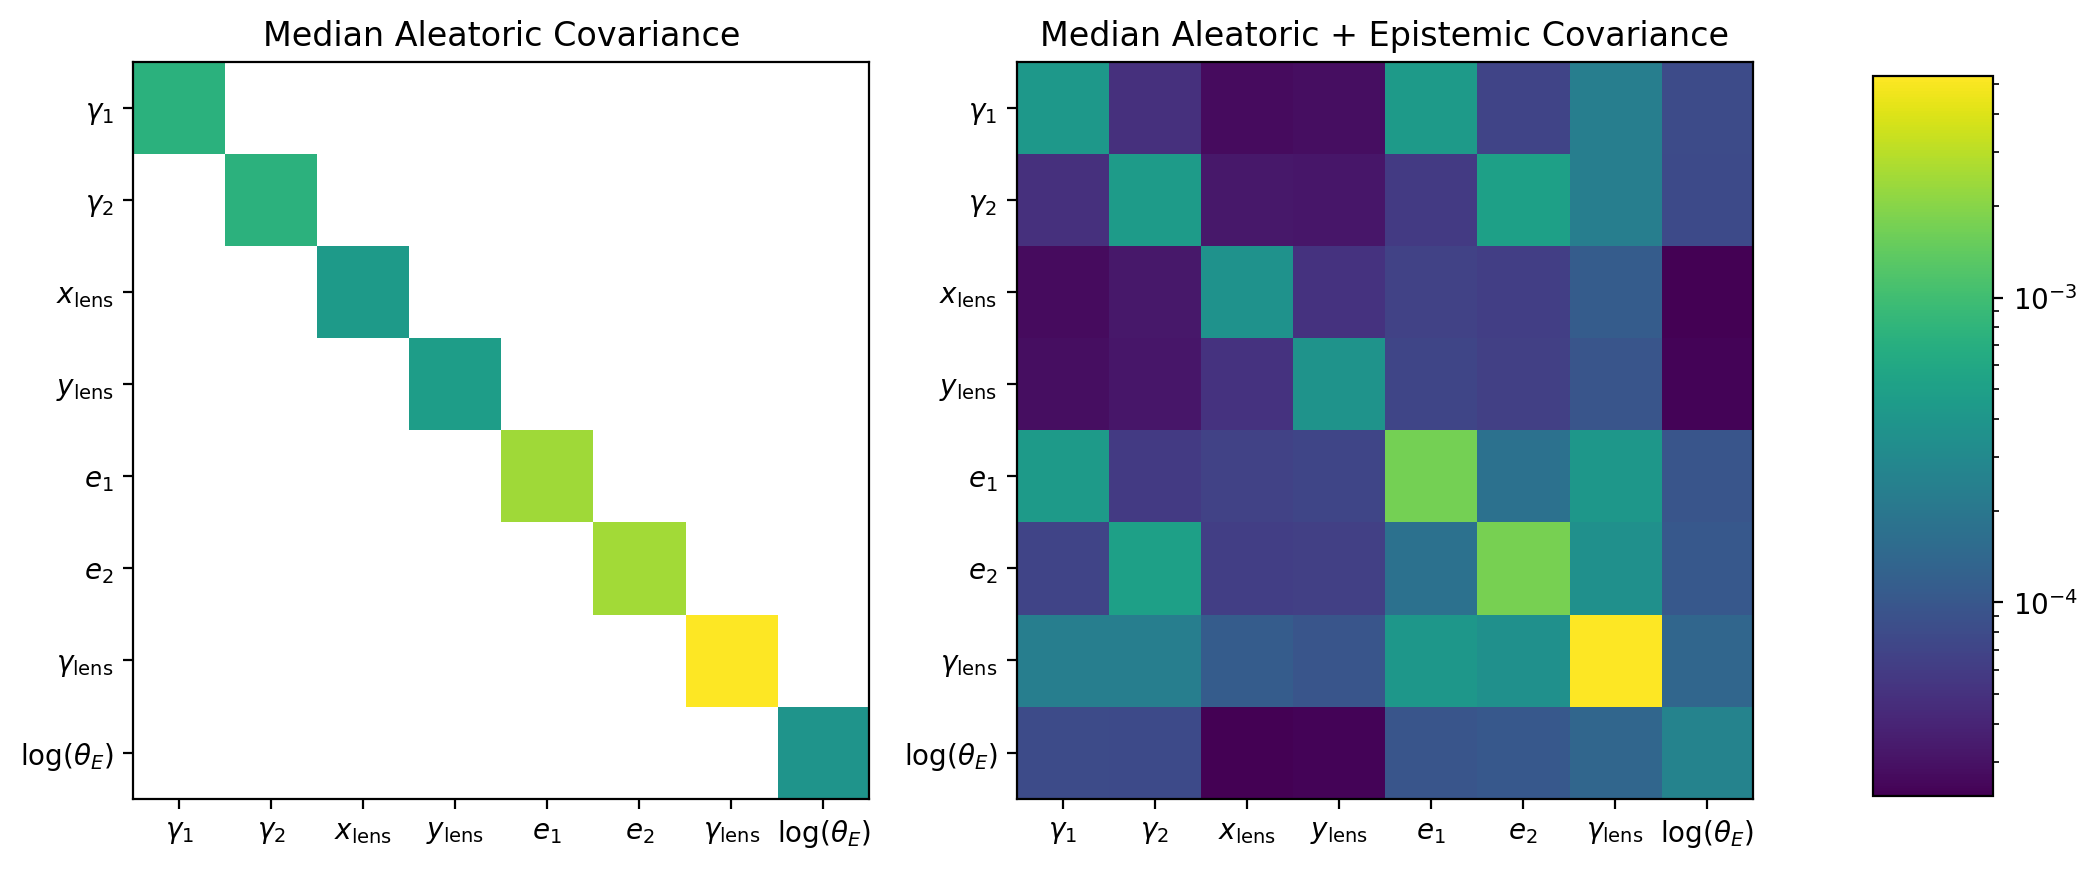

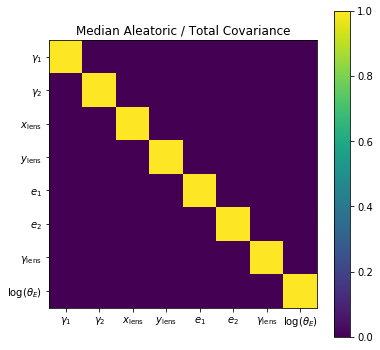

In [11]:
bnn_infer.comp_al_ep_unc(norm_diagonal=False)

## Diagonal Low Regularizer

In [12]:
config_path = root_path + 'configs/nn1_lr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
save_path_nn1_lr = root_path + 'validation_results/nn1_lr_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn1_lr)

Is model built: True
No weights found. Saving new weights to /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn1_lr.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn1_lr_samps/


In [13]:
bnn_infer.report_stats()

Parameter, RMSE, Median Abs Error, Median Std
external_shear_g1 0.029717263757783493 0.008511662407756262 0.010492264059972632
external_shear_g2 0.02362857576036684 0.008170946736927769 0.010615878179680429
lens_mass_center_x 0.013728371204715897 0.005078736973390902 0.008175667537929261
lens_mass_center_y 0.01626844156072788 0.004684570388503336 0.008366142135924917
lens_mass_e1 0.03493723617158658 0.014556100331648447 0.019375006504904015
lens_mass_e2 0.03546203351438091 0.013629073968218022 0.019361919066338544
lens_mass_gamma 0.055554776180210944 0.02748827717970137 0.03451897617254869
lens_mass_theta_E_log 0.018604810229531296 0.005566340797306564 0.007690016837679715


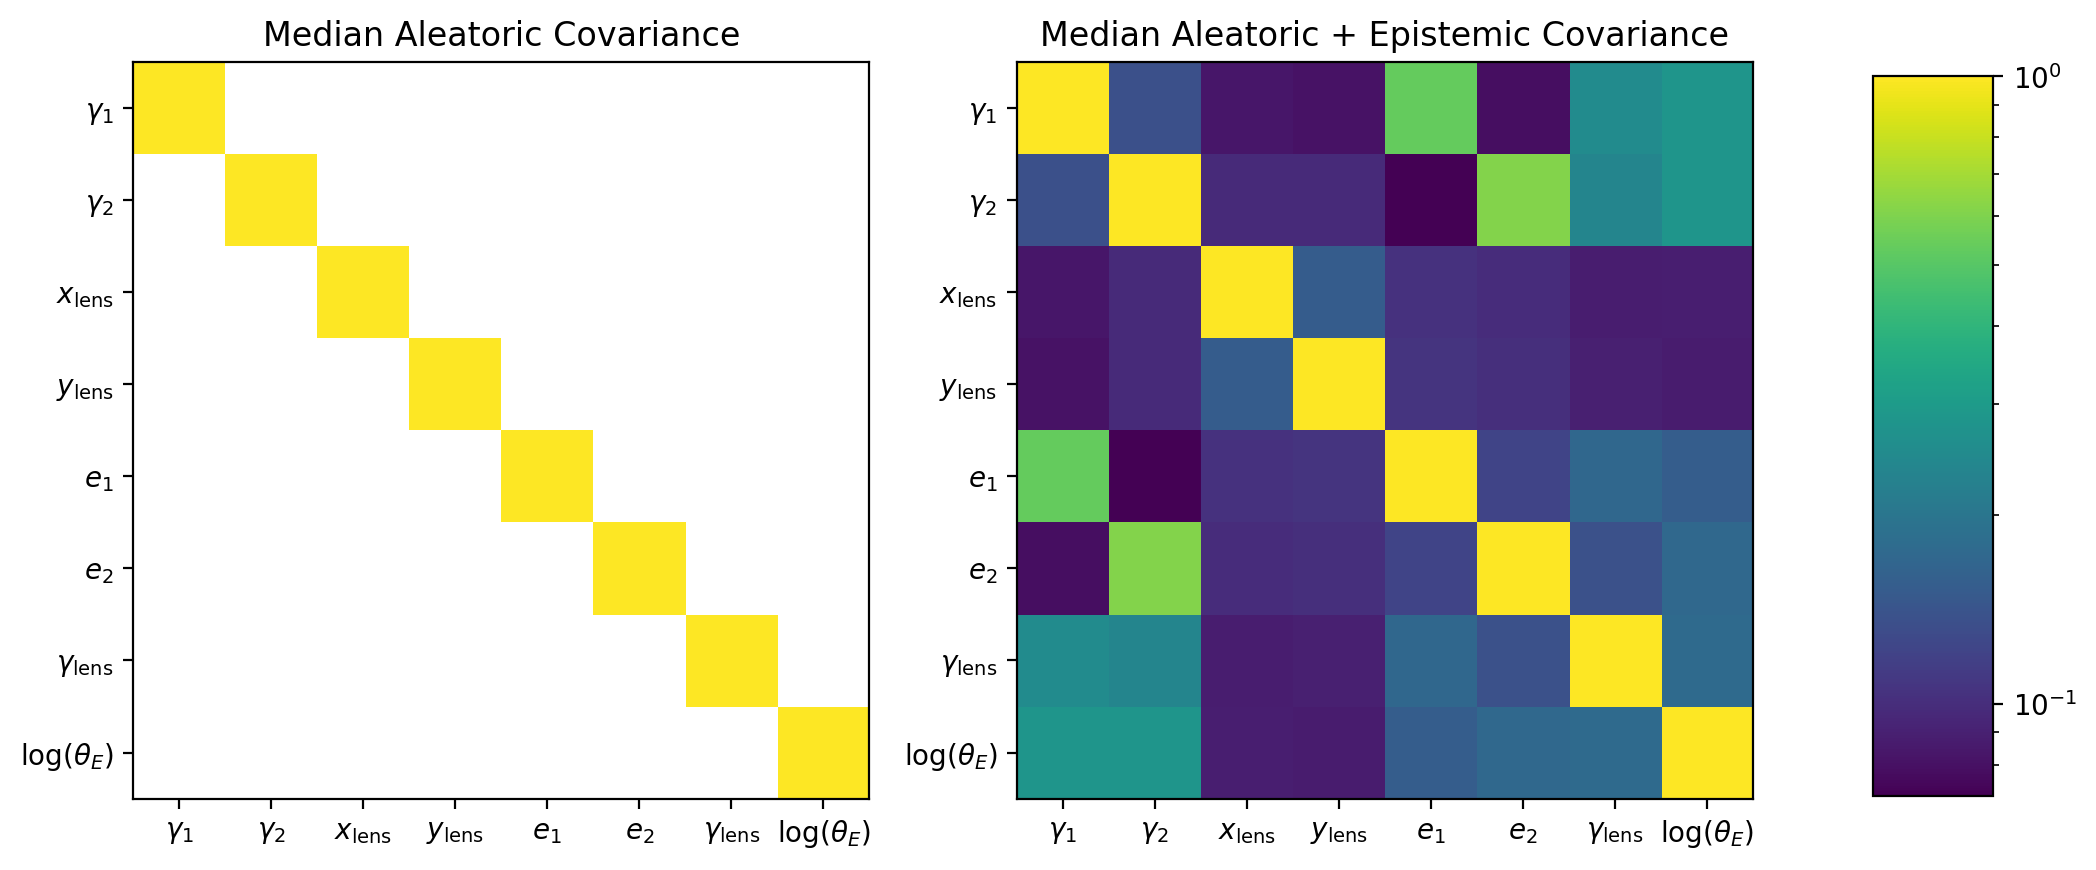

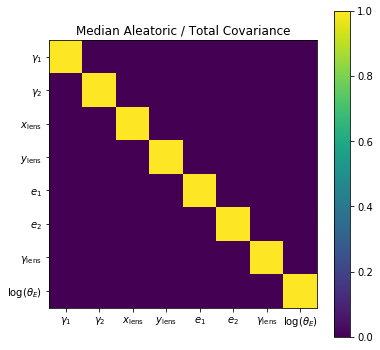

In [14]:
bnn_infer.comp_al_ep_unc(norm_diagonal=True)

## Comparison of Diagonals

Is model built: True
No weights found. Saving new weights to /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn1_lr.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn1_lr_samps/
Is model built: True
No weights found. Saving new weights to /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn1.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn1_samps/
Is model built: True
No weights found. Saving new weights to /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn1_hr.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn1_hr_samps/


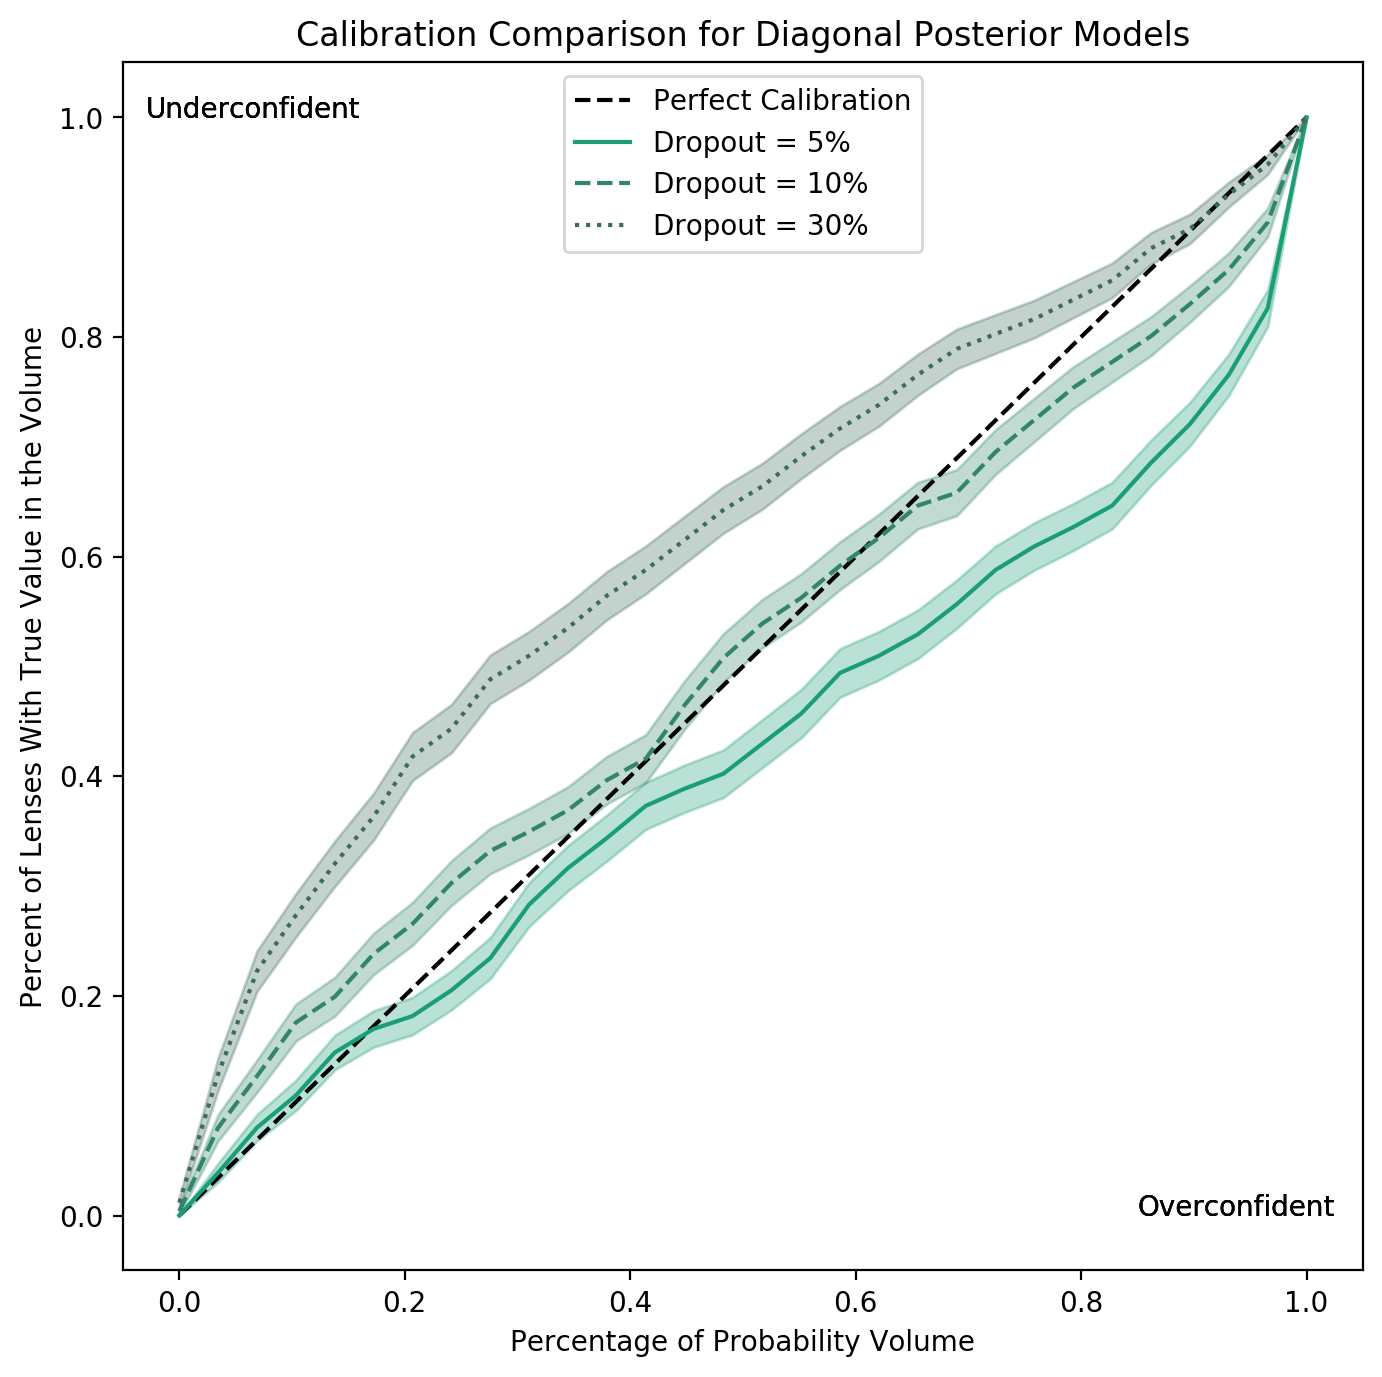

In [15]:
# color_map = ['#000000','#1b9e77','#d95f02','#7570b3','#e7298a']
color_map = ['#000000','#1b9e77','#32856c','#3d6b5d']
ls_list =['-','--',':']

# NN1_LR
config_path = root_path + 'configs/nn1_lr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn1_lr)
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False,ls=ls_list[0])

# NN1
config_path = root_path + 'configs/nn1.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn1)
fig = bnn_infer.plot_calibration(color_map=color_map[1:],n_perc_points=n_perc_points,figure=fig,show_plot=False,
                                ls=ls_list[1])

# NN1_HR
config_path = root_path + 'configs/nn1_hr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn1_hr)
fig = bnn_infer.plot_calibration(color_map=color_map[2:],n_perc_points=n_perc_points,figure=fig,show_plot=True,
                                legend=['Perfect Calibration',r'Dropout = 5%',r'Dropout = 10%',
                                       r'Dropout = 30%'],
                                 title='Calibration Comparison for Diagonal Posterior Models',
                                ls=ls_list[2])

## Full Posterior

In [16]:
config_path = root_path + 'configs/nn2.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
save_path_nn2 = root_path + 'validation_results/nn2_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn2)

Is model built: True
No weights found. Saving new weights to /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn2.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn2_samps/


In [17]:
bnn_infer.report_stats()

Parameter, RMSE, Median Abs Error, Median Std
external_shear_g1 0.049221681994902 0.007380993476293436 0.014000517685844076
external_shear_g2 0.022122174765141382 0.008323778841622886 0.014383918277771933
lens_mass_center_x 0.01296683557894323 0.004341853968289738 0.009015893736103023
lens_mass_center_y 0.015986591967067316 0.004910027035516951 0.00911067325992802
lens_mass_e1 0.03716533913807087 0.01382482539298524 0.02390521691759598
lens_mass_e2 0.036286199229606325 0.013246891871324235 0.023493539110772392
lens_mass_gamma 0.0580730761429111 0.02527817022541501 0.04812236843518482
lens_mass_theta_E_log 0.022927620232764553 0.004586944522752025 0.009020553747968748


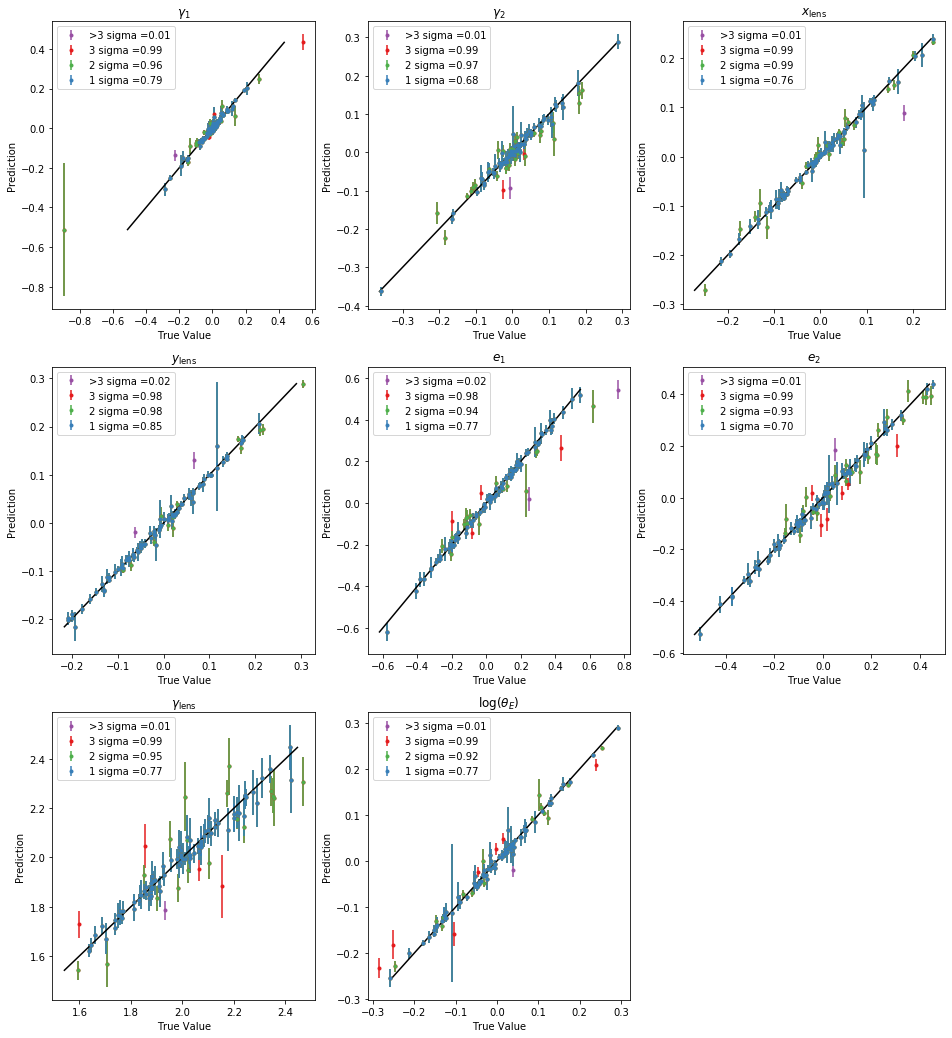

In [18]:
bnn_infer.gen_coverage_plots(num_lenses=num_lenses)

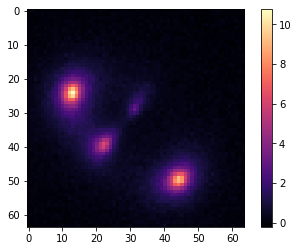

external_shear_g1 -0.010193272
external_shear_g2 0.13869636
lens_mass_center_x -0.17355964
lens_mass_center_y 0.02074528
lens_mass_e1 -0.175672
lens_mass_e2 -0.50477195
lens_mass_gamma 1.7390438
lens_mass_theta_E_log 0.10074298


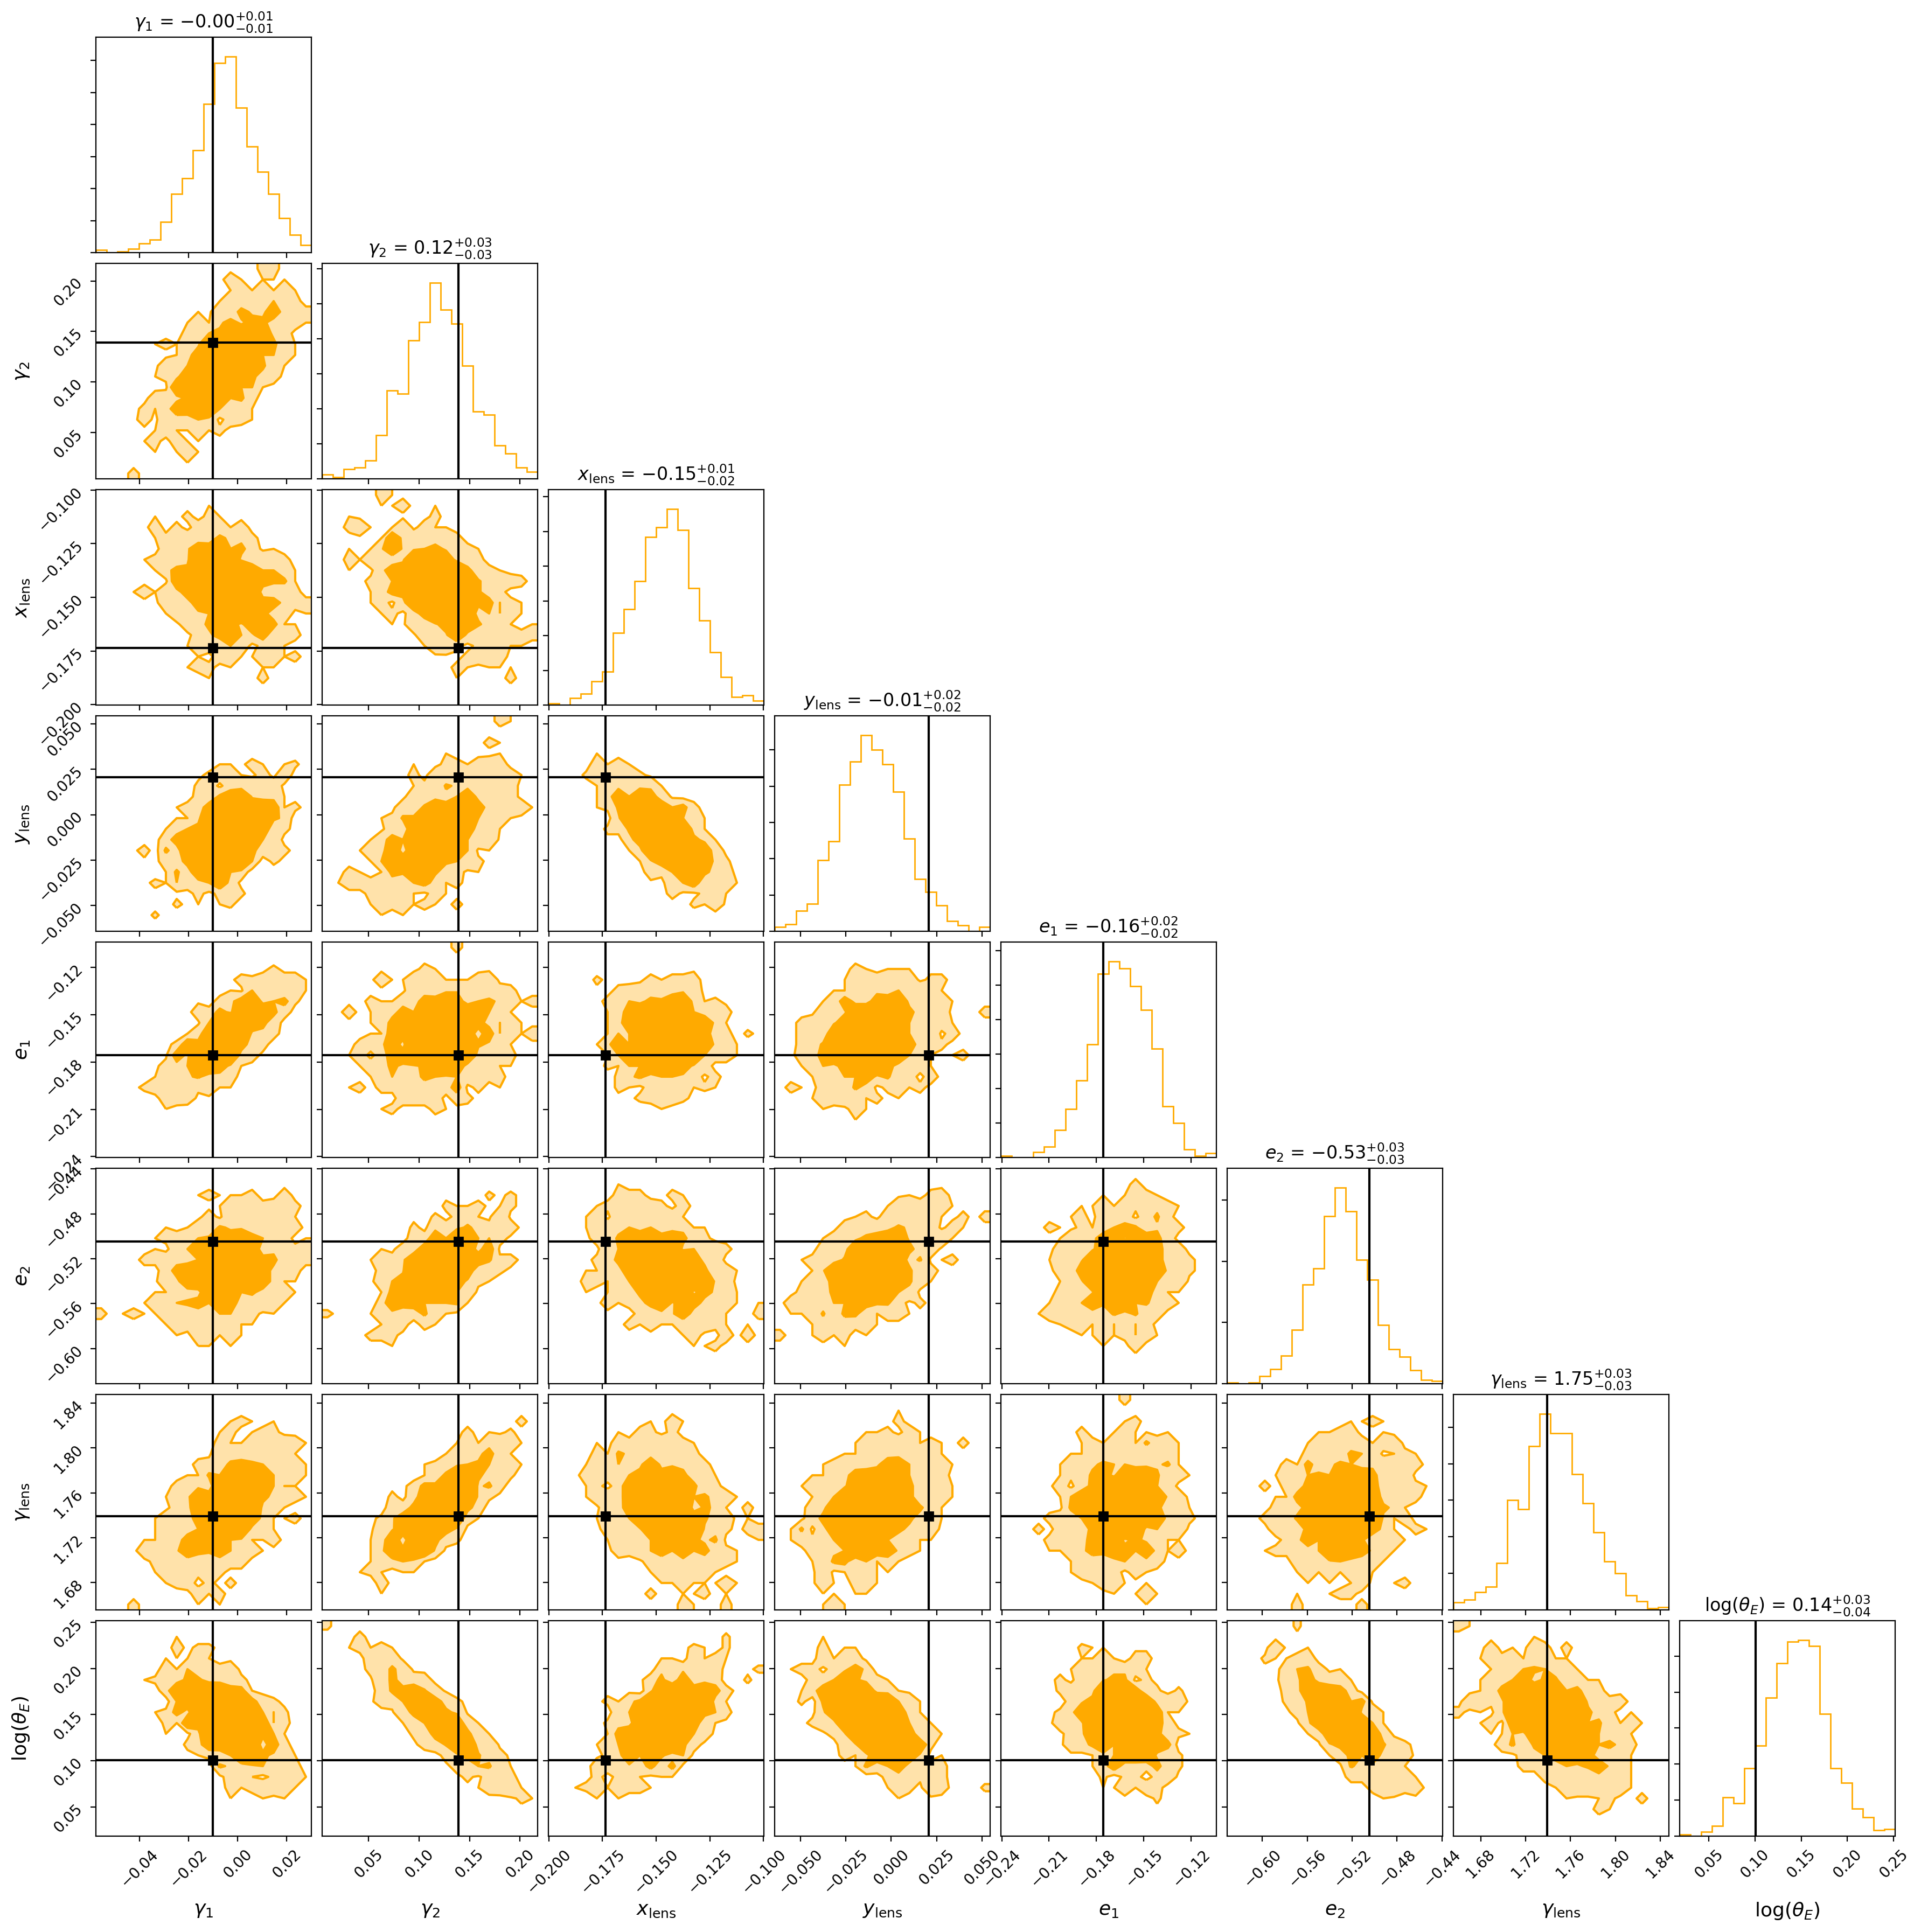

In [19]:
image_index = 21
bnn_infer.plot_posterior_contours(image_index)

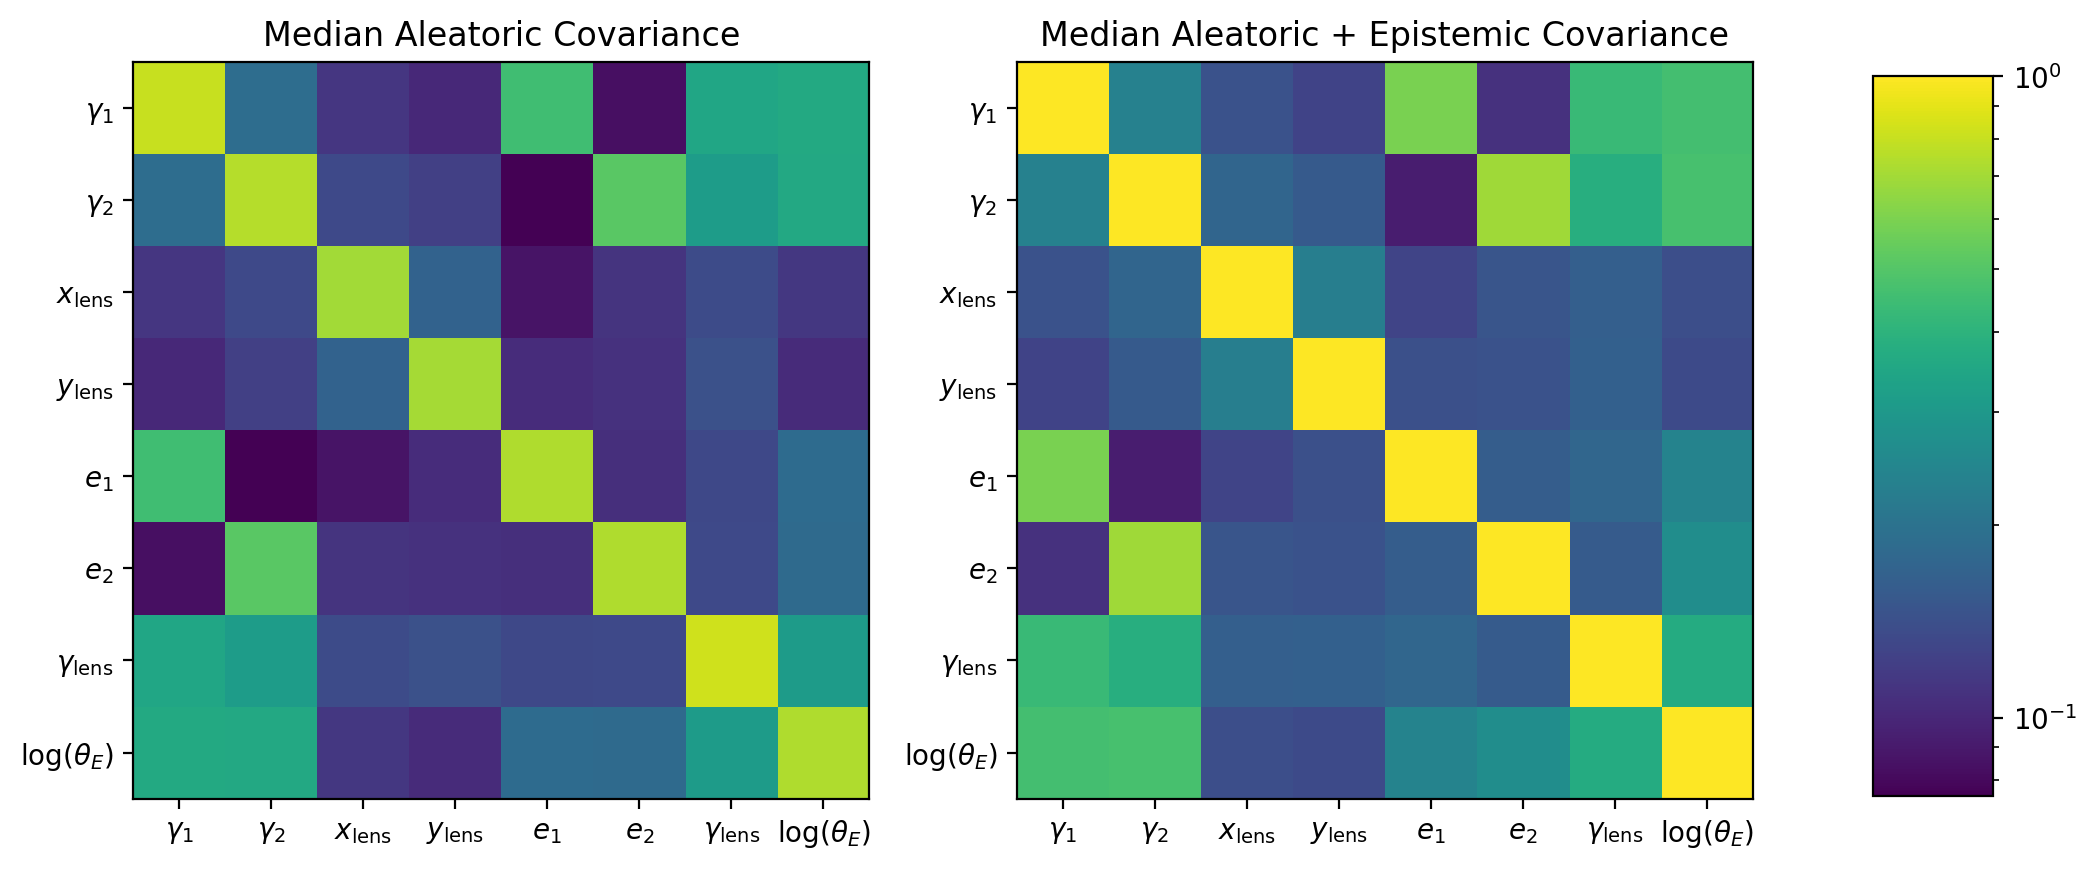

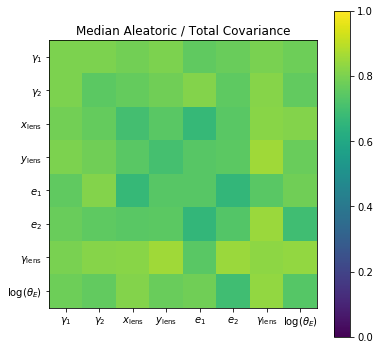

In [20]:
bnn_infer.comp_al_ep_unc()

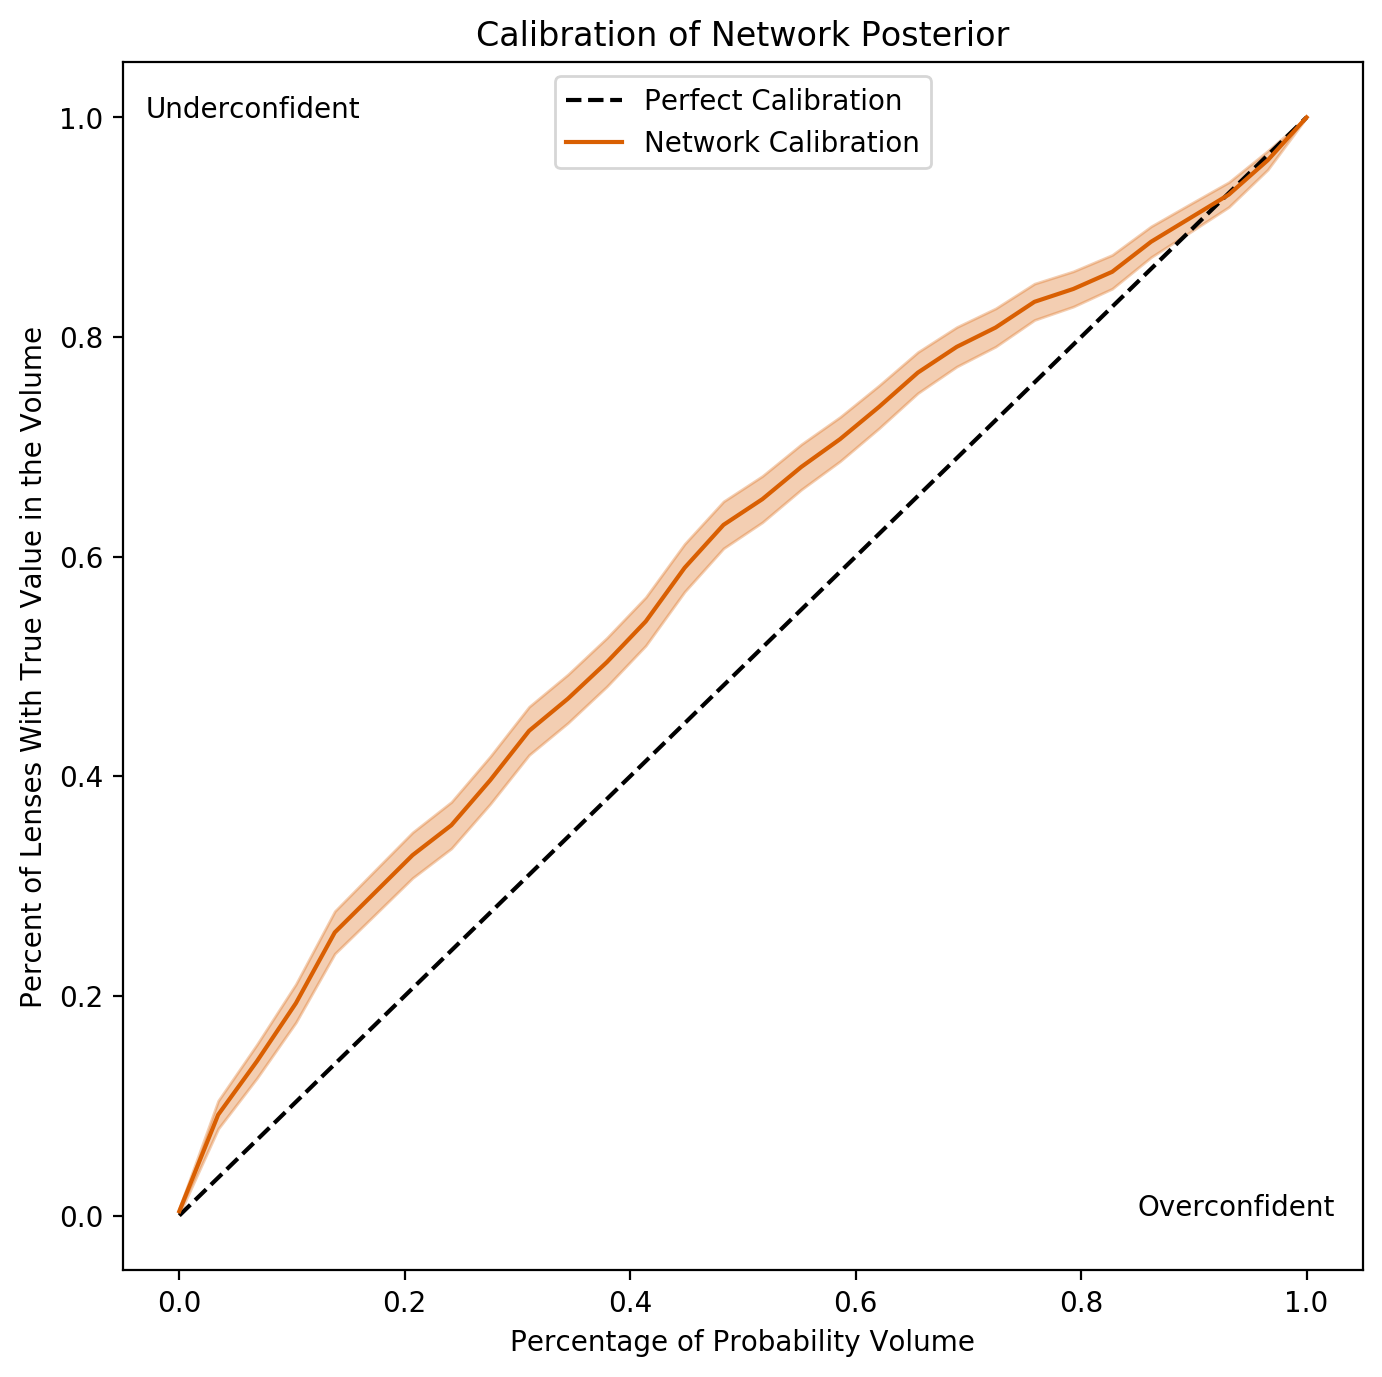

In [21]:
color_map = ['#000000','#d95f02']
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False)

## Full Posterior Low Regularization

In [22]:
config_path = root_path + 'configs/nn2_lr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
save_path_nn2_lr = root_path + 'validation_results/nn2_lr_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn2_lr)

Is model built: True
No weights found. Saving new weights to /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn2_lr.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn2_lr_samps/


In [23]:
bnn_infer.report_stats()

Parameter, RMSE, Median Abs Error, Median Std
external_shear_g1 0.050245748506643303 0.007343658289707747 0.01271149394048995
external_shear_g2 0.020737539132033467 0.007346360903174306 0.013027102846031329
lens_mass_center_x 0.013585394121689224 0.004553034069737359 0.008177967747980144
lens_mass_center_y 0.01690759734527657 0.005096218651329858 0.008199189969362147
lens_mass_e1 0.038202148860169774 0.013149921694542165 0.02219982659333332
lens_mass_e2 0.03559223892864517 0.012476922720516377 0.02174434394369322
lens_mass_gamma 0.05740454366230543 0.026992368555915136 0.045559001667118806
lens_mass_theta_E_log 0.025177625606747606 0.005121155232958911 0.008335930675176658


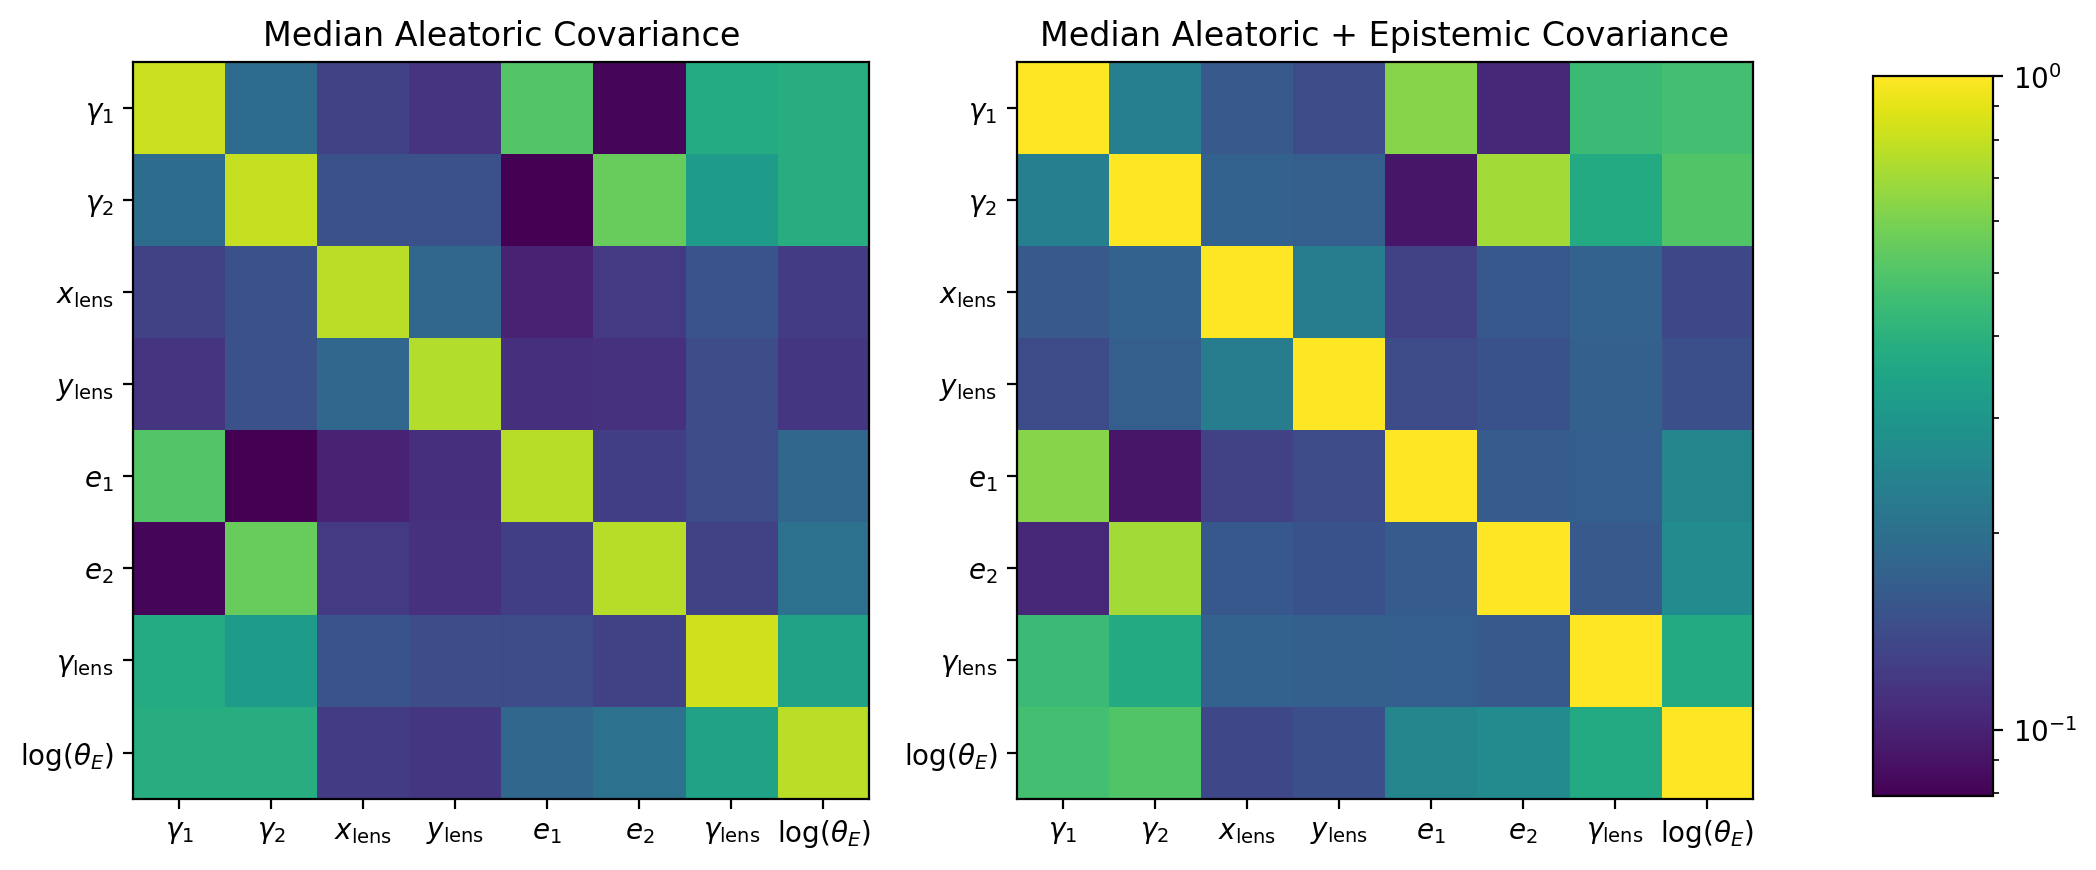

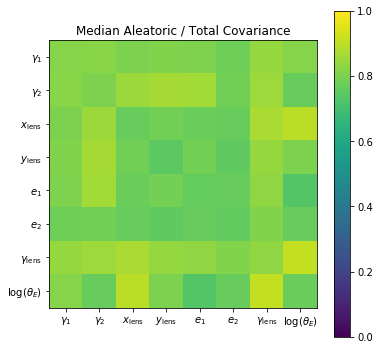

In [24]:
bnn_infer.comp_al_ep_unc()

## Full Posterior High Regularization

In [25]:
config_path = root_path + 'configs/nn2_hr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
save_path_nn2_hr = root_path + 'validation_results/nn2_hr_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn2_hr)

Is model built: True
No weights found. Saving new weights to /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn2_hr.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn2_hr_samps/


In [26]:
bnn_infer.report_stats()

Parameter, RMSE, Median Abs Error, Median Std
external_shear_g1 0.040369072856818455 0.008107884468974369 0.018714888988473108
external_shear_g2 0.020530972909734553 0.008176695075406276 0.019555069443581624
lens_mass_center_x 0.013117233980526503 0.004636187079923202 0.01297270183776255
lens_mass_center_y 0.015462468386903178 0.005087423894631918 0.013344153477389355
lens_mass_e1 0.03757250921121861 0.013597138084443478 0.03326207111929403
lens_mass_e2 0.03577413522875592 0.013060552077364618 0.03303465693285045
lens_mass_gamma 0.058998091556556755 0.029386940327808087 0.06197637315788594
lens_mass_theta_E_log 0.02100766577977207 0.005065371535455396 0.012760427216312882


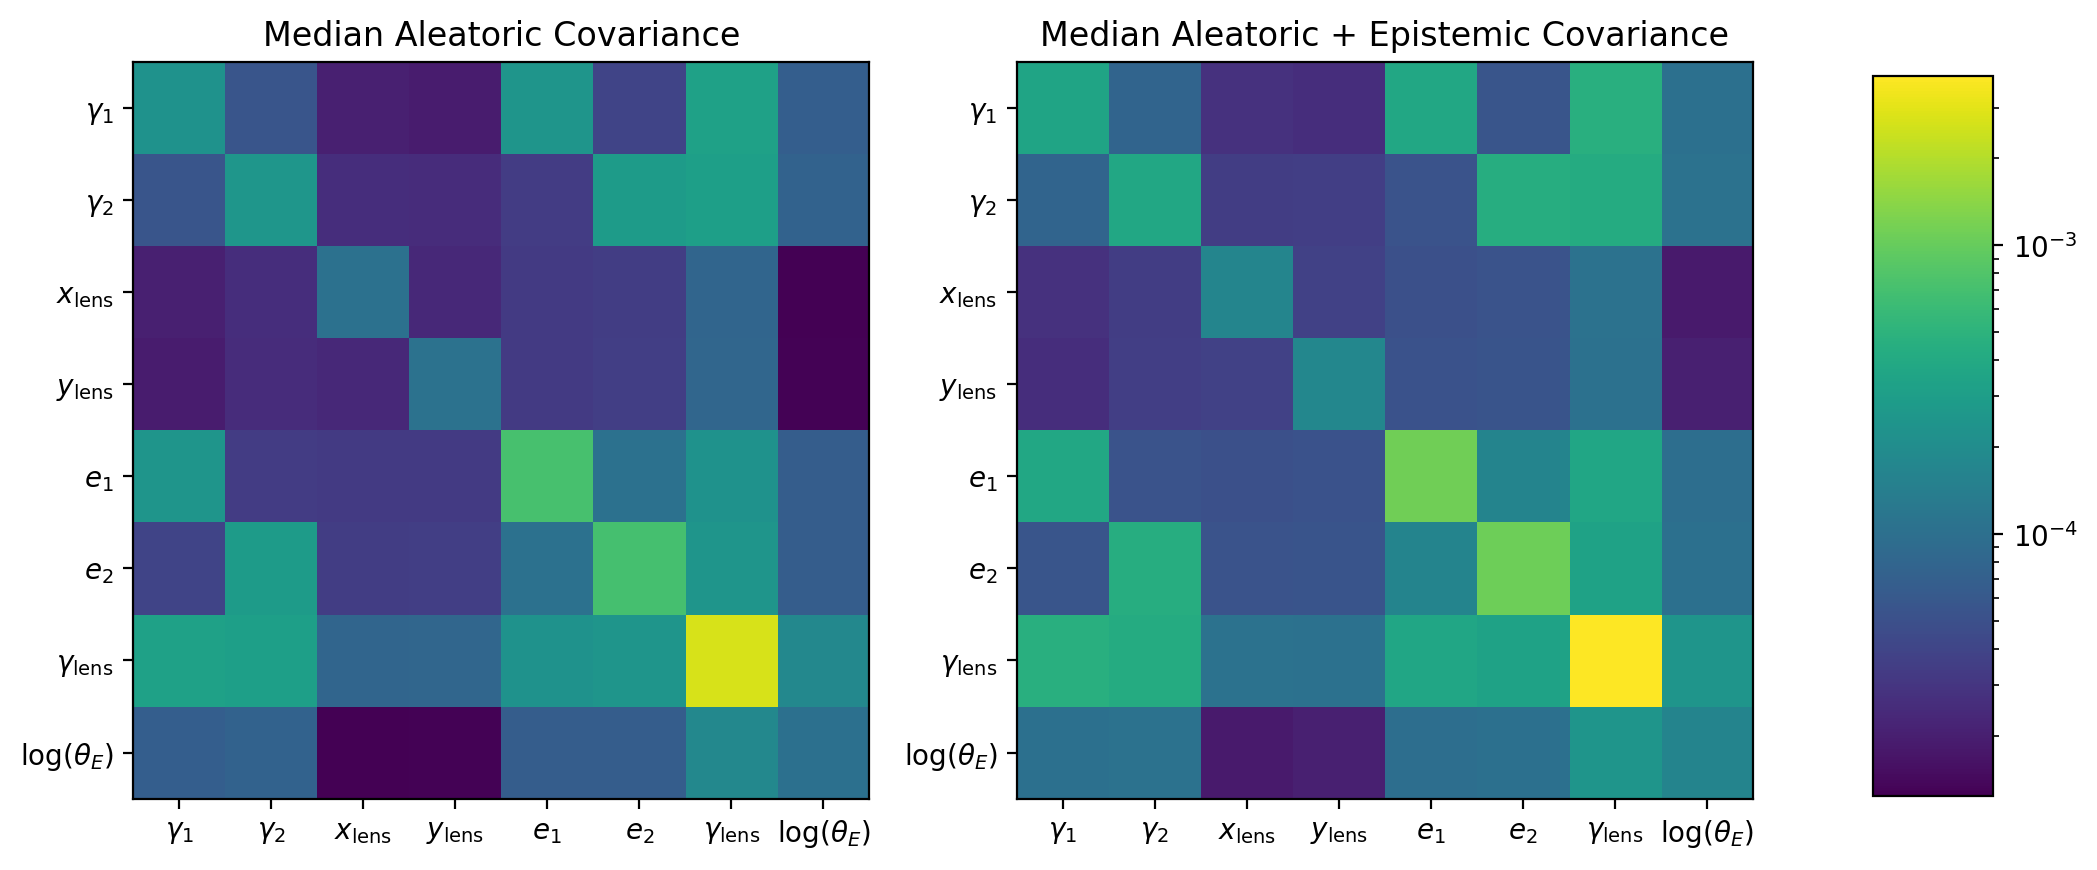

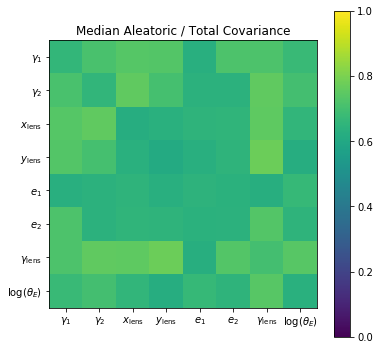

In [27]:
bnn_infer.comp_al_ep_unc(norm_diagonal=False)

## Comparison of Fulls

Is model built: True
No weights found. Saving new weights to /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn2_lr.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn2_lr_samps/
Is model built: True
No weights found. Saving new weights to /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn2.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn2_samps/
Is model built: True
No weights found. Saving new weights to /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn2_hr.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn2_hr_samps/


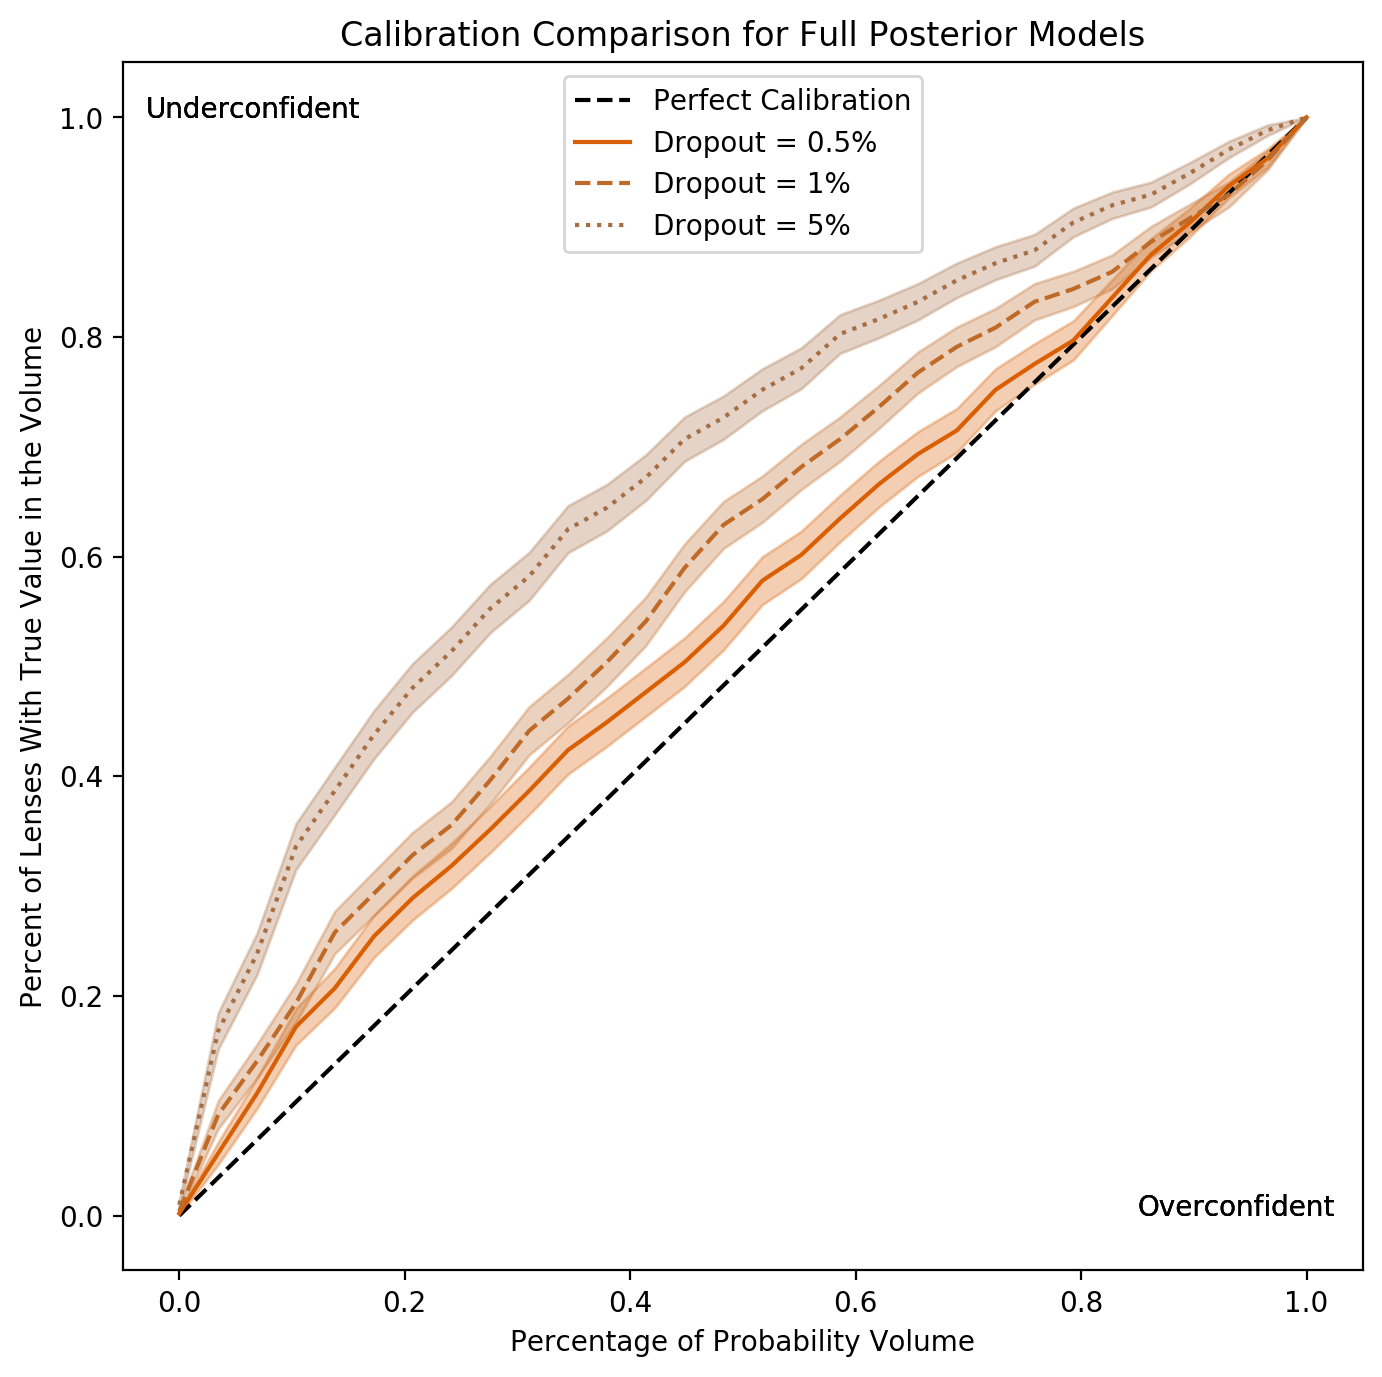

In [28]:
# color_map = ['#000000','#1b9e77','#d95f02','#7570b3','#e7298a']
color_map = ['#000000','#d95f02','#c06a28','#a66e44']
ls_list =['-','--',':']

# NN2_LR
config_path = root_path + 'configs/nn2_lr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn2_lr)
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False,ls=ls_list[0])

# NN2
config_path = root_path + 'configs/nn2.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn2)
fig = bnn_infer.plot_calibration(color_map=color_map[1:],n_perc_points=n_perc_points,figure=fig,show_plot=False,
                                ls=ls_list[1])

# NN2_HR
config_path = root_path + 'configs/nn2_hr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn2_hr)
fig = bnn_infer.plot_calibration(color_map=color_map[2:],n_perc_points=n_perc_points,figure=fig,show_plot=True,
                                legend=['Perfect Calibration',r'Dropout = 0.5%',r'Dropout = 1%',
                                       r'Dropout = 5%'],
                                 title='Calibration Comparison for Full Posterior Models',ls=ls_list[2])

## GM Posterior

In [29]:
# First specify the config path
config_path = root_path + 'configs/nn3.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
num_samples = 1000
save_path_nn3 = root_path + 'validation_results/nn3_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn3)

Is model built: True
No weights found. Saving new weights to /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn3.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn3_samps/


In [30]:
bnn_infer.model.output_shape

(None, 89)

In [31]:
bnn_infer.report_stats()

Parameter, RMSE, Median Abs Error, Median Std
external_shear_g1 0.051555129017219974 0.00931319999797148 0.016300187131566765
external_shear_g2 0.02321989339895055 0.009475971013512618 0.016925794723350228
lens_mass_center_x 0.014820019728062463 0.005844321297914829 0.010402700412449239
lens_mass_center_y 0.019065607194480486 0.005465031447436871 0.01083754754497876
lens_mass_e1 0.041002185791694554 0.016295066528176392 0.028748765228707066
lens_mass_e2 0.03695209096925888 0.014285534189334377 0.028638976385757083
lens_mass_gamma 0.06167379842434006 0.029499445382562883 0.05429978162394232
lens_mass_theta_E_log 0.024360958526459153 0.005291109556183967 0.010693838829275036


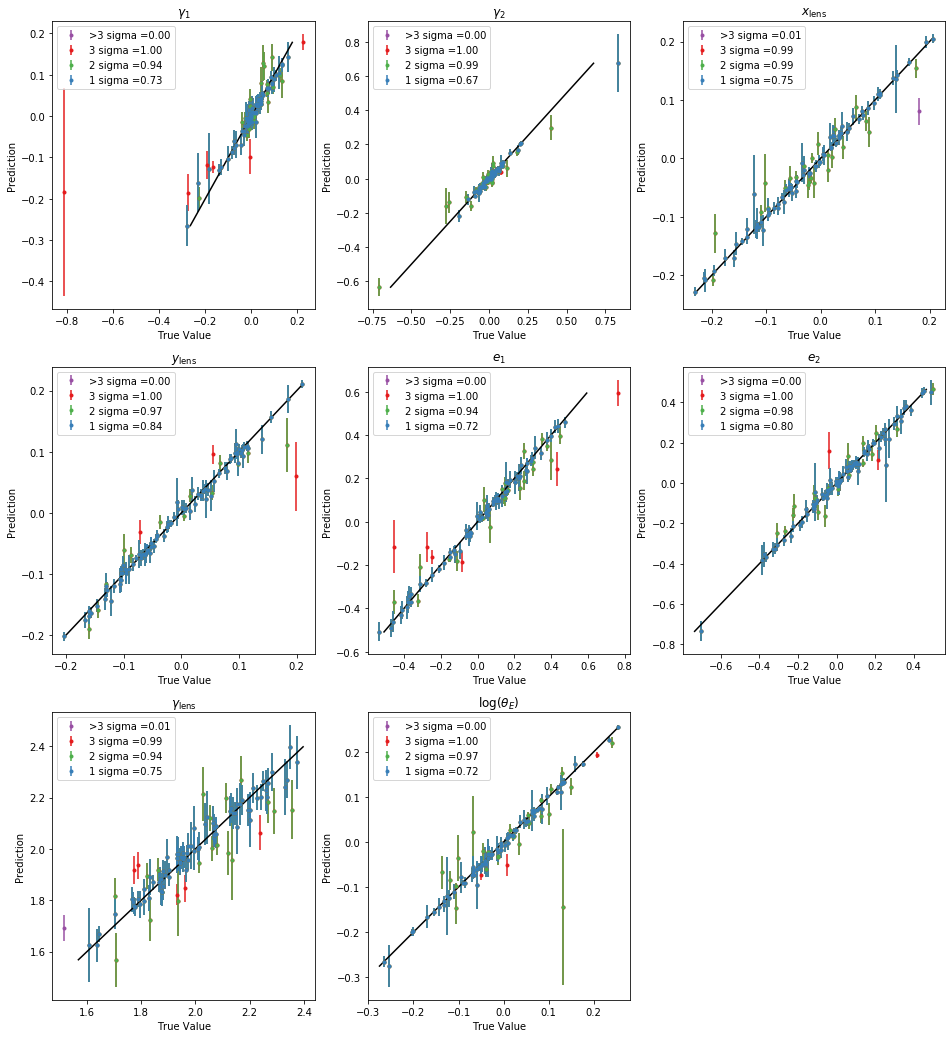

In [32]:
bnn_infer.gen_coverage_plots(num_lenses=num_lenses)

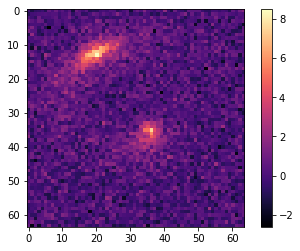

external_shear_g1 -0.007303609
external_shear_g2 0.019501524
lens_mass_center_x -0.03333531
lens_mass_center_y 0.05058787
lens_mass_e1 0.2034167
lens_mass_e2 0.012050792
lens_mass_gamma 1.8765153
lens_mass_theta_E_log 0.12615937


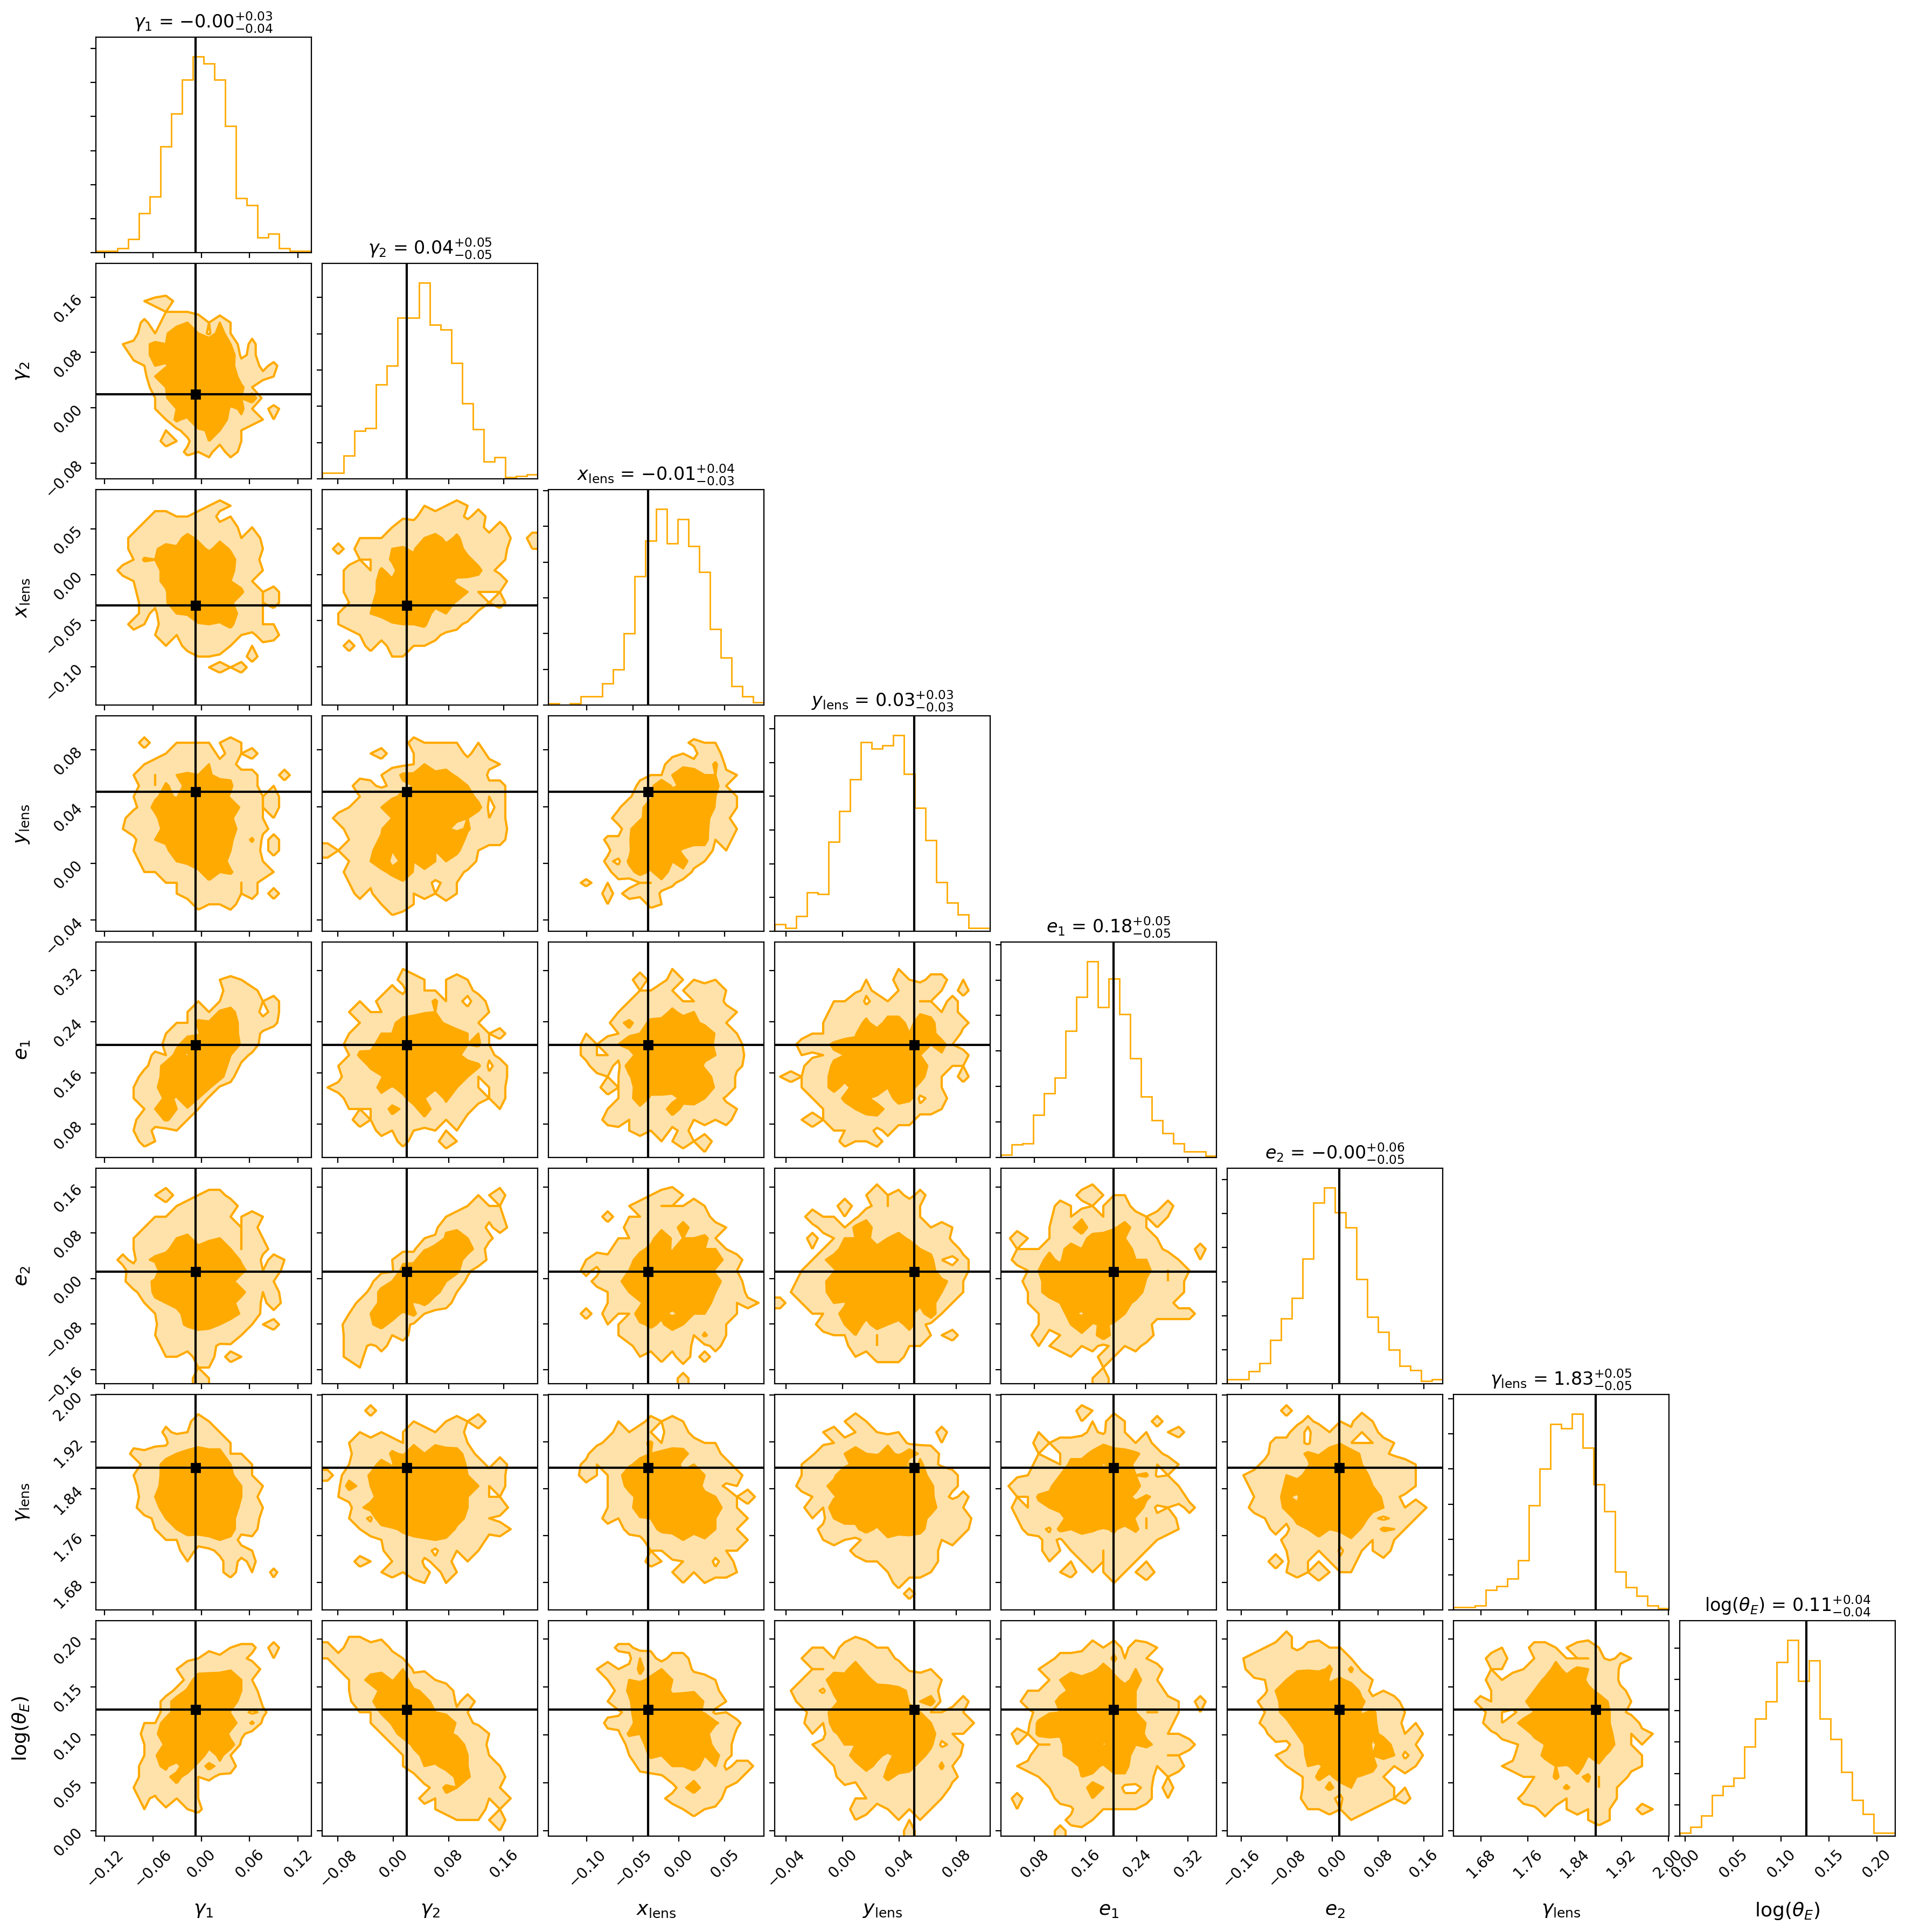

In [33]:
image_index = 20
bnn_infer.plot_posterior_contours(image_index)

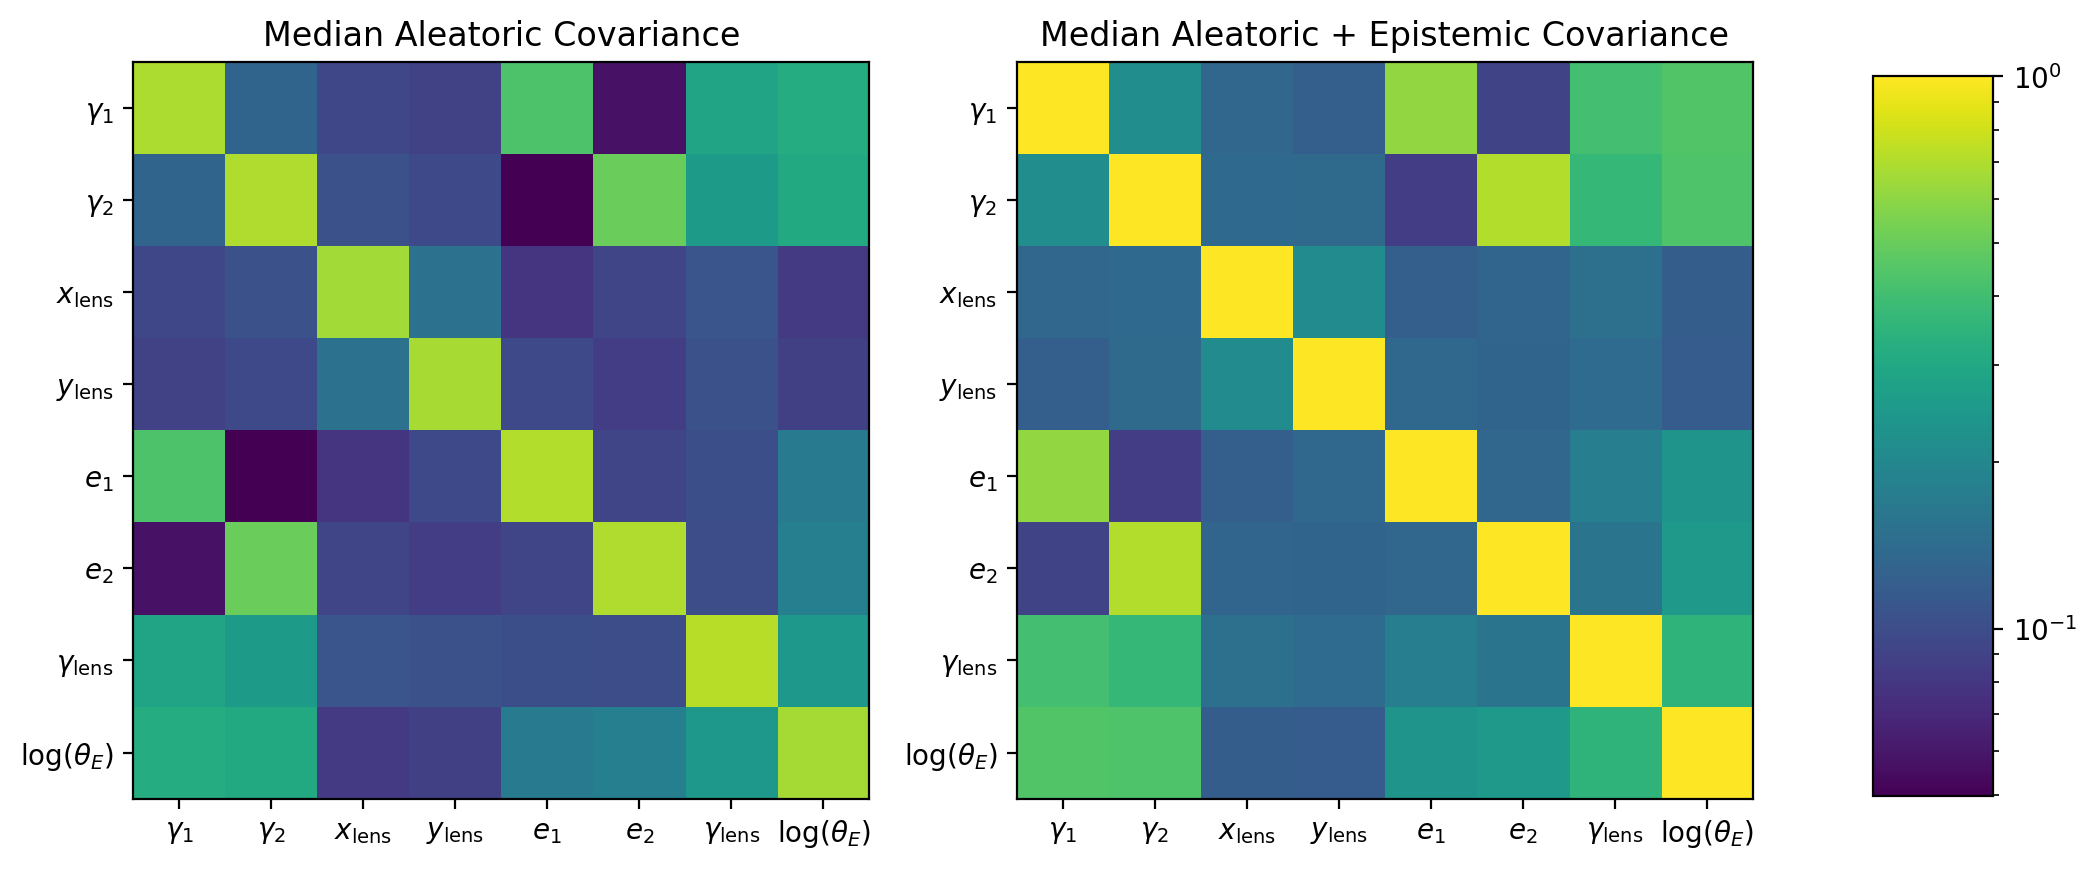

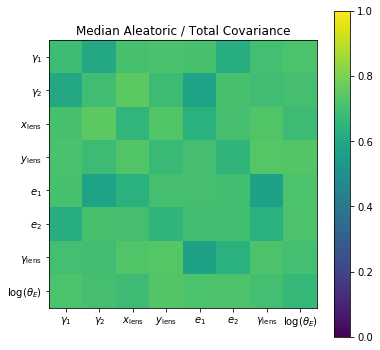

In [34]:
bnn_infer.comp_al_ep_unc()

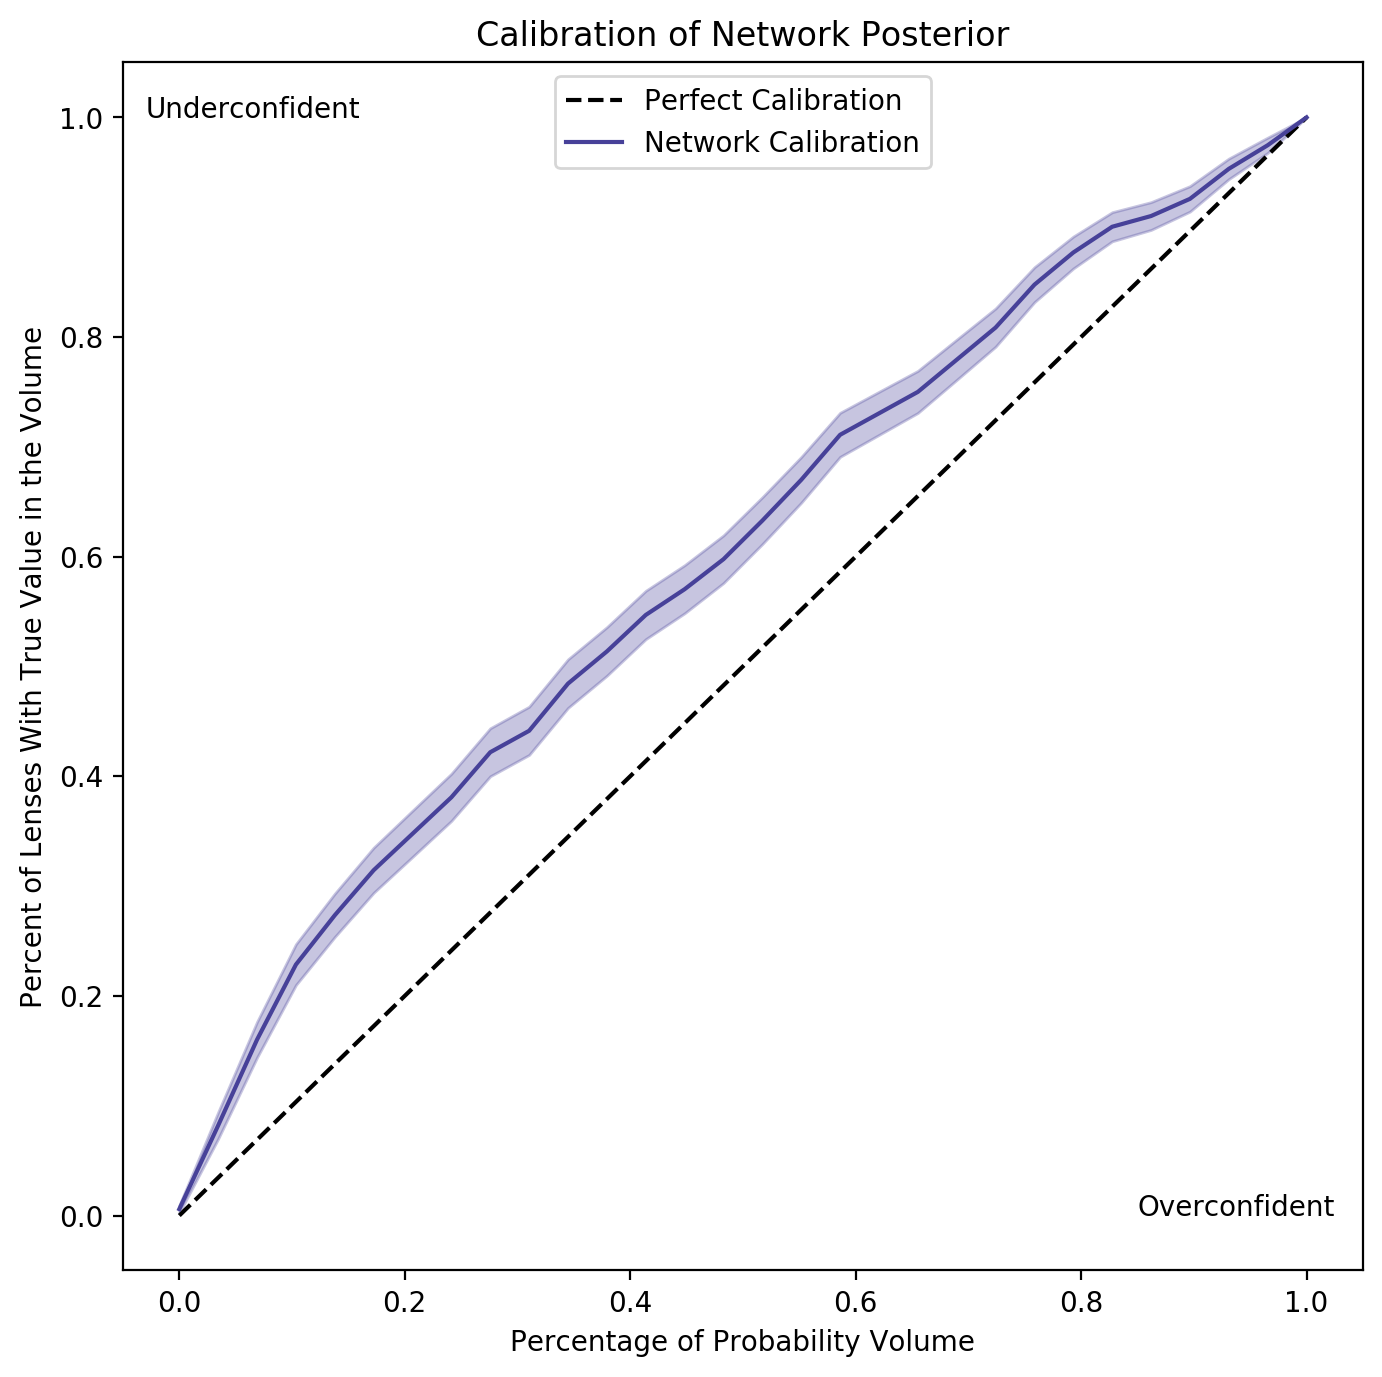

In [35]:
color_map = ['#000000','#474199']
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False)

## GMM High Regularization

In [36]:
config_path = root_path + 'configs/nn3_hr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
save_path_nn3_hr = root_path + 'validation_results/nn3_hr_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn3_hr)

Is model built: True
No weights found. Saving new weights to /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn3_hr.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn3_hr_samps/


In [37]:
bnn_infer.report_stats()

Parameter, RMSE, Median Abs Error, Median Std
external_shear_g1 0.048476038178191516 0.009684834404720462 0.022044365905782765
external_shear_g2 0.02195792091432915 0.008578536558353373 0.02285537143452913
lens_mass_center_x 0.015659979913198754 0.005003246312952545 0.015477351701074744
lens_mass_center_y 0.017447915469003778 0.005494727254426915 0.015801502535695837
lens_mass_e1 0.04369761112860984 0.016479272665715944 0.03954297582126283
lens_mass_e2 0.03857898968200154 0.01448015773620736 0.04019308635558252
lens_mass_gamma 0.062023185751995696 0.027736044589337316 0.07200804613272085
lens_mass_theta_E_log 0.023062913716274974 0.005161962577919295 0.014997123333656364


## GMM Low Regularization

In [38]:
config_path = root_path + 'configs/nn3_lr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
save_path_nn3_lr = root_path + 'validation_results/nn3_lr_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn3_lr)

Is model built: True
Loaded weights /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn3_lr.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn3_lr_samps/


In [39]:
bnn_infer.report_stats()

Parameter, RMSE, Median Abs Error, Median Std
external_shear_g1 0.05776110139177583 0.009332741554394178 0.015358824426599232
external_shear_g2 0.024573964002913694 0.008683191627542953 0.015583430536552501
lens_mass_center_x 0.014707282964147785 0.00531584128241927 0.009929496834979176
lens_mass_center_y 0.019764023251144472 0.005406139722958059 0.009960842250415498
lens_mass_e1 0.04221797248344365 0.015120226139750968 0.026882717449317306
lens_mass_e2 0.04067046986557986 0.014976361306715535 0.02736576341484433
lens_mass_gamma 0.06277254567356318 0.028367187591701315 0.05394554043758837
lens_mass_theta_E_log 0.02843988263235813 0.005648587011600051 0.010146567029328101


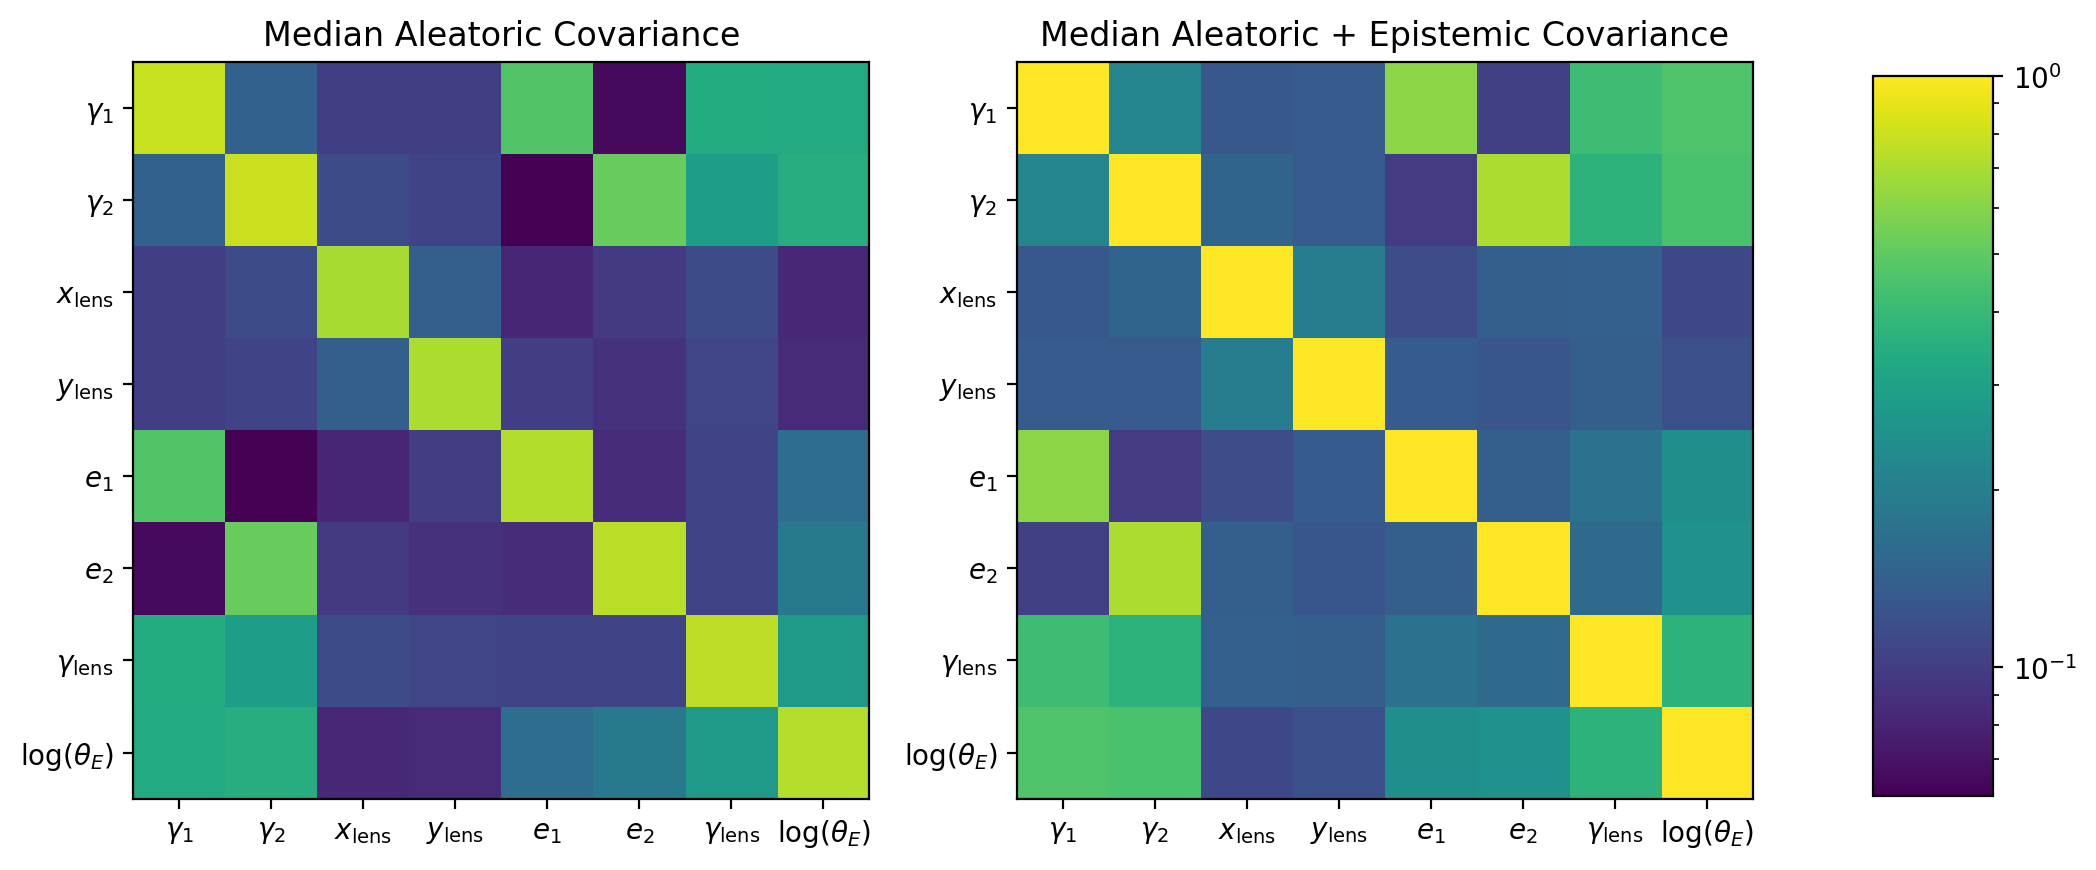

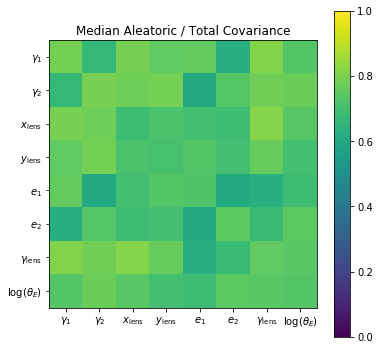

In [40]:
bnn_infer.comp_al_ep_unc()

## GMM Comparison

Is model built: True
Loaded weights /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn3_lr.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn3_lr_samps/
Is model built: True
No weights found. Saving new weights to /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn3.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn3_samps/
Is model built: True
No weights found. Saving new weights to /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn3_hr.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn3_hr_samps/


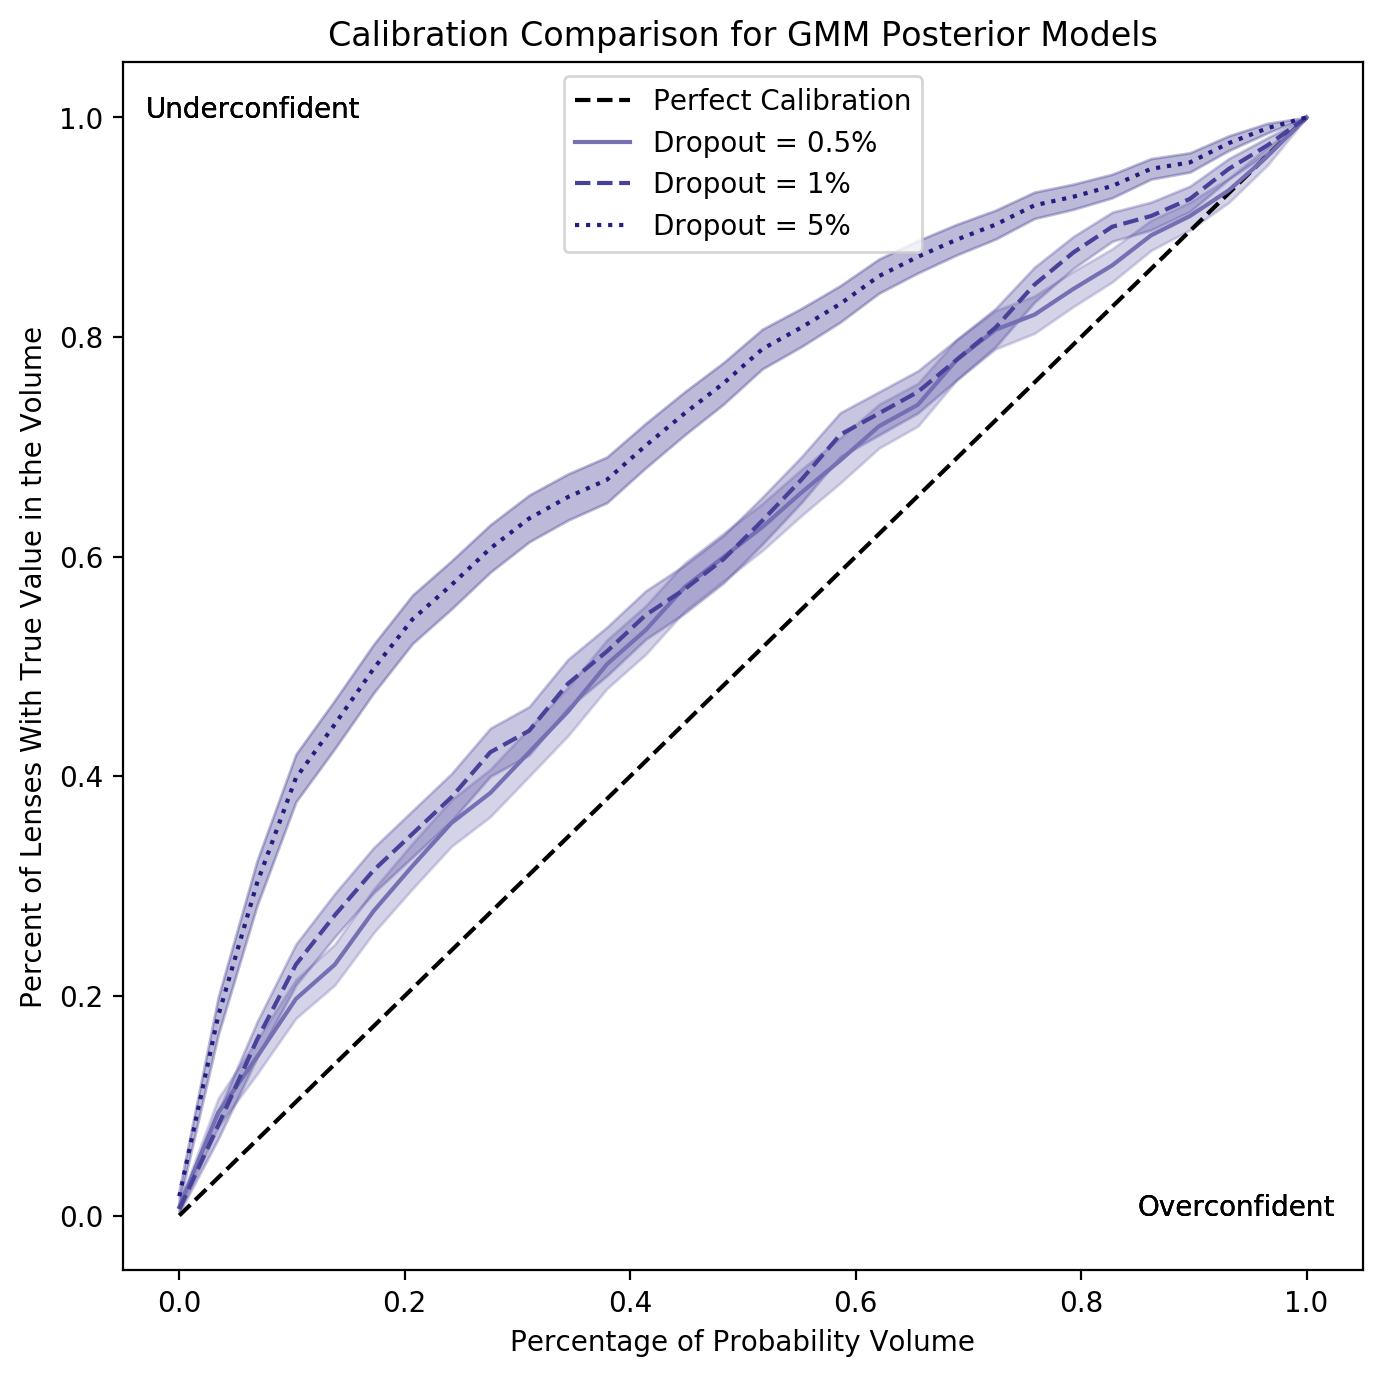

In [41]:
# color_map = ['#000000','#1b9e77','#d95f02','#7570b3','#e7298a']
color_map = ['#000000','#7570b3','#474199','#241d80']
ls_list =['-','--',':']

# NN3_LR
config_path = root_path + 'configs/nn3_lr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn3_lr)
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False,ls=ls_list[0])

# NN3
config_path = root_path + 'configs/nn3.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn3)
fig = bnn_infer.plot_calibration(color_map=color_map[1:],n_perc_points=n_perc_points,figure=fig,show_plot=False,
                                ls=ls_list[1])

# NN3_HR
config_path = root_path + 'configs/nn3_hr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn3_hr)
fig = bnn_infer.plot_calibration(color_map=color_map[2:],n_perc_points=n_perc_points,figure=fig,show_plot=True,
                                legend=['Perfect Calibration',r'Dropout = 0.5%',r'Dropout = 1%',
                                       r'Dropout = 5%'],
                                 title='Calibration Comparison for GMM Posterior Models',ls=ls_list[2])

## Combined Plot

Is model built: True
No weights found. Saving new weights to /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn1_hr.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn1_hr_samps/
Is model built: True
No weights found. Saving new weights to /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn2_lr.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn2_lr_samps/
Is model built: True
Loaded weights /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn3_lr.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/validation_results/nn3_lr_samps/


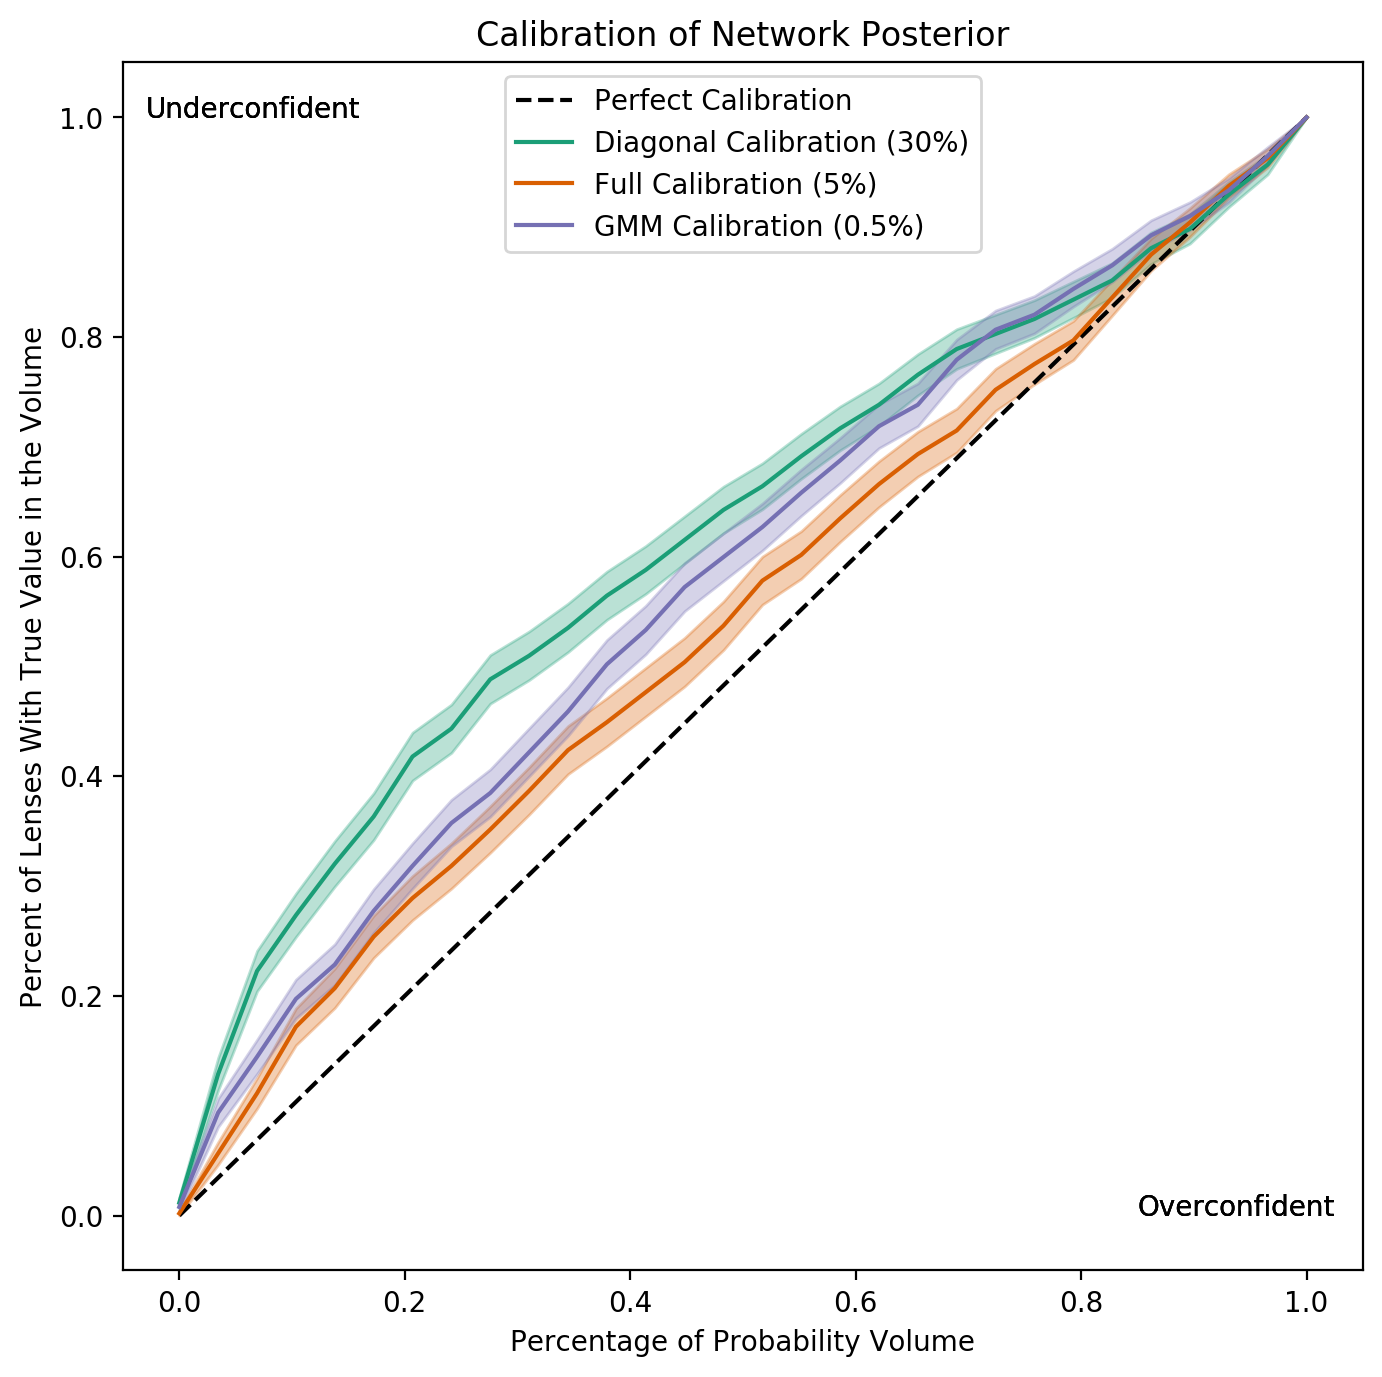

In [42]:
# First specify the config path
config_path = root_path + 'configs/nn1_hr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
num_samples = 1000
bnn_infer.gen_samples(num_samples,save_path_nn1_hr)

color_map = ['#000000','#1b9e77','#d95f02','#7570b3','#e7298a']
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False)

# NN2
config_path = root_path + 'configs/nn2_lr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn2_lr)
fig = bnn_infer.plot_calibration(color_map=color_map[1:],n_perc_points=n_perc_points,figure=fig,show_plot=False)

# NN3
config_path = root_path + 'configs/nn3_lr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn3_lr)
fig = bnn_infer.plot_calibration(color_map=color_map[2:],n_perc_points=n_perc_points,figure=fig,show_plot=True,
                                legend=['Perfect Calibration',r'Diagonal Calibration (30%)',r'Full Calibration (5%)',
                                       r'GMM Calibration (0.5%)'])